# Volcanic Forcings and Feedback
* Wenchang Yang (wenchang@princeton.edu)
* Department of Geoscience, Princeton University

In [1]:
%run -im pythonstartup

**2019-05-14T12:33:22.741967**
>>> Importing Python 3.7.3 packages...
[OK]: import sys, os, os.path, datetime, glob
[OK]: import numpy as np-1.16.3
[OK]: import matplotlib as mpl-3.0.3; backend: module://ipykernel.pylab.backend_inline
[OK]: #---import matplotlib.pyplot as plt
[OK]: #---from pylab import *
[OK]: import xarray as xr-0.12.1
[OK]: #---import netCDF4
[OK]: #---import dask
[OK]: #---import bottleneck
[OK]: import pandas as pd-0.24.2
[OK]: from mpl_toolkits.basemap import Basemap
      PROJ_LIB = /scratch/gpfs/GEOCLIM/wenchang/miniconda3/envs/geoclim/share/proj
>>>Import packages from Wenchang Yang (wython)...
[OK]: import geoplots as gt
[OK]: from geoplots import geoplot, fxyplot, mapplot, xticksyear
[OK]: import geoxarray
[OK]: import filter
[OK]: import xlearn
[OK]: import mysignal as sig
**Done**


In [18]:
from lib.util import year_shift
import xlearn
import seaborn as sns
from mystats import p2t

%matplotlib notebook

In [4]:
# params
nino_ens = [1, 3, 4, 7, 9, 12, 17, 22, 26, 29]
nina_ens = [2, 5, 6, 8, 10, 11, 16, 23, 27, 30]
neut_ens = [13, 14, 15, 18, 19, 20, 21, 24, 25, 28]

In [3]:
land_mask = xr.open_dataset('/tigress/wenchang/MODEL_OUT/CTL1860_noleap_tigercpu_intelmpi_18_576PE/POSTP/00010101.atmos_month.nc') \
    .land_mask.rename({'grid_xt': 'lon', 'grid_yt': 'lat'})

In [4]:
# data
if 'das' in globals() or 'das' in locals():
    pass
else:
    das = dict()

volcs = ['Agung', 'StMaria', 'Pinatubo']
years = [1963, 1902, 1991]

# non-nudged
datanames = ('netrad_toa', 't_surf', 'precip')
for dataname in datanames:
    # volc
    ifiles = [f'data/{volc}_PI_ens_noleap.atmos_month.{dataname}.nc'
             for volc in volcs]
    for volc, ifile in zip(volcs, ifiles):
        key = f'{volc}_{dataname}'
        if key in das.keys():
            print('\t[Exists]:', key)
        else:
            print(key)
            da = xr.open_dataarray(ifile).geo.fldmean()
            das[key] = da

        # NH 
        key_ = key + '_nh'
        if key_ in das.keys():
            print('\t[Exists]:', key_)
        else:
            print(key_)
            da = xr.open_dataarray(ifile).sel(lat=slice(0,90)).geo.fldmean()
            das[key_] = da


        # SH
        key_ = key + '_sh'
        if key_ in das.keys():
            print('\t[Exists]:', key_)
        else:
            print(key_)
            da = xr.open_dataarray(ifile).sel(lat=slice(-90,0)).geo.fldmean()
            das[key_] = da
        
        if dataname in ('precip',):
            # global land 
            key_ = key + '_land'
            if key_ in das.keys():
                print('\t[Exists]:', key_)
            else:
                print(key_)
                da = xr.open_dataarray(ifile).where(land_mask>0.5).geo.fldmean()
                das[key_] = da

            # NH land
            key_ = key + '_nhland'
            if key_ in das.keys():
                print('\t[Exists]:', key_)
            else:
                print(key_)
                da = xr.open_dataarray(ifile).where(land_mask>0.5).sel(lat=slice(0,90)).geo.fldmean()
                das[key_] = da

            # SH land
            key_ = key + '_shland'
            if key_ in das.keys():
                print('\t[Exists]:', key_)
            else:
                print(key_)
                da = xr.open_dataarray(ifile).where(land_mask>0.5).sel(lat=slice(-90,0)).geo.fldmean()
                das[key_] = da


    # ctl
    ifile = f'data/CTL1860_noleap_tigercpu_intelmpi_18_576PE.atmos_month.{dataname}.nc'
    for volc, year in zip(volcs, years):
        key = f'{volc}_ctl_{dataname}'
        if key in das.keys():
            print('\t[Exists]:', key)
        else:
            print(key)
            da = xr.open_dataarray(ifile).geo.fldmean()
            da = year_shift(da, n=year-1, to_datetime=True)
            das[key] = da

        # NH 
        key_ = key + '_nh'
        if key_ in das.keys():
            print('\t[Exists]:', key_)
        else:
            print(key_)
            da = xr.open_dataarray(ifile).sel(lat=slice(0,90)).geo.fldmean()
            da = year_shift(da, n=year-1, to_datetime=True)
            das[key_] = da

        # SH
        key_ = key + '_sh'
        if key_ in das.keys():
            print('\t[Exists]:', key_)
        else:
            print(key_)
            da = xr.open_dataarray(ifile).sel(lat=slice(-90,0)).geo.fldmean()
            da = year_shift(da, n=year-1, to_datetime=True)
            das[key_] = da
        
        if dataname in ('precip',):
            # global land 
            key_ = key + '_land'
            if key_ in das.keys():
                print('\t[Exists]:', key_)
            else:
                print(key_)
                da = xr.open_dataarray(ifile).where(land_mask>0.5).geo.fldmean()
                da = year_shift(da, n=year-1, to_datetime=True)
                das[key_] = da

            # NH land
            key_ = key + '_nhland'
            if key_ in das.keys():
                print('\t[Exists]:', key_)
            else:
                print(key_)
                da = xr.open_dataarray(ifile).where(land_mask>0.5).sel(lat=slice(0,90)).geo.fldmean()
                da = year_shift(da, n=year-1, to_datetime=True)
                das[key_] = da

            # SH land
            key_ = key + '_shland'
            if key_ in das.keys():
                print('\t[Exists]:', key_)
            else:
                print(key_)
                da = xr.open_dataarray(ifile).where(land_mask>0.5).sel(lat=slice(-90,0)).geo.fldmean()
                da = year_shift(da, n=year-1, to_datetime=True)
                das[key_] = da


# nudged
datanames = ('netrad_toa',)
for dataname in datanames:
    # volc_nudge
    ifiles = [f'data/{volc}_ens_noleap_nudgeclimo_all_model1860.atmos_month.{dataname}.nc'
             for volc in volcs]
    for volc, ifile in zip(volcs, ifiles):
        key = f'{volc}_nudge_{dataname}'
        if key in das.keys():
            print('\t[Exists]:', key)
        else:
            print(key)
            da = xr.open_dataarray(ifile).geo.fldmean()
            das[key] = da

        # NH 
        key_ = key + '_nh'
        if key_ in das.keys():
            print('\t[Exists]:', key_)
        else:
            print(key_)
            da = xr.open_dataarray(ifile).sel(lat=slice(0,90)).geo.fldmean()
            das[key_] = da


        # SH
        key_ = key + '_sh'
        if key_ in das.keys():
            print('\t[Exists]:', key_)
        else:
            print(key_)
            da = xr.open_dataarray(ifile).sel(lat=slice(-90,0)).geo.fldmean()
            das[key_] = da

    # ctl_nudge
    ifile = f'data/nudgeclimo_all_model_CTL1860_tigercpu_intelmpi_18_576PE.atmos_month.{dataname}.nc'
    for volc, year in zip(volcs, years):
        key = f'{volc}_nudge_ctl_{dataname}'
        if key in das.keys():
            print('\t[Exists]:', key)
        else:
            print(key)
            da = xr.open_dataarray(ifile).geo.fldmean()
            da = year_shift(da, n=year-1, to_datetime=True)
            das[key] = da

        # NH 
        key_ = key + '_nh'
        if key_ in das.keys():
            print('\t[Exists]:', key_)
        else:
            print(key_)
            da = xr.open_dataarray(ifile).sel(lat=slice(0,90)).geo.fldmean()
            da = year_shift(da, n=year-1, to_datetime=True)
            das[key_] = da


        # SH
        key_ = key + '_sh'
        if key_ in das.keys():
            print('\t[Exists]:', key_)
        else:
            print(key_)
            da = xr.open_dataarray(ifile).sel(lat=slice(-90,0)).geo.fldmean()
            da = year_shift(da, n=year-1, to_datetime=True)
            das[key_] = da


Agung_netrad_toa
Agung_netrad_toa_nh
Agung_netrad_toa_sh
StMaria_netrad_toa
StMaria_netrad_toa_nh
StMaria_netrad_toa_sh
Pinatubo_netrad_toa
Pinatubo_netrad_toa_nh
Pinatubo_netrad_toa_sh
Agung_ctl_netrad_toa
Agung_ctl_netrad_toa_nh
Agung_ctl_netrad_toa_sh
StMaria_ctl_netrad_toa
StMaria_ctl_netrad_toa_nh
StMaria_ctl_netrad_toa_sh
Pinatubo_ctl_netrad_toa
Pinatubo_ctl_netrad_toa_nh
Pinatubo_ctl_netrad_toa_sh
Agung_t_surf
Agung_t_surf_nh
Agung_t_surf_sh
StMaria_t_surf
StMaria_t_surf_nh
StMaria_t_surf_sh
Pinatubo_t_surf
Pinatubo_t_surf_nh
Pinatubo_t_surf_sh
Agung_ctl_t_surf
Agung_ctl_t_surf_nh
Agung_ctl_t_surf_sh
StMaria_ctl_t_surf
StMaria_ctl_t_surf_nh
StMaria_ctl_t_surf_sh
Pinatubo_ctl_t_surf
Pinatubo_ctl_t_surf_nh
Pinatubo_ctl_t_surf_sh
Agung_precip
Agung_precip_nh
Agung_precip_sh
Agung_precip_land
Agung_precip_nhland
Agung_precip_shland
StMaria_precip
StMaria_precip_nh
StMaria_precip_sh
StMaria_precip_land
StMaria_precip_nhland
StMaria_precip_shland
Pinatubo_precip
Pinatubo_precip_nh
Pin

In [62]:
# nudged
datanames = ('t_surf',)
for dataname in datanames:
    # volc_nudge
    ifiles = [f'data/{volc}_ens_noleap_nudgeclimo_all_model1860.atmos_month.{dataname}.nc'
             for volc in volcs]
    for volc, ifile in zip(volcs, ifiles):
        key = f'{volc}_nudge_{dataname}'
        if key in das.keys():
            print('\t[Exists]:', key)
        else:
            print(key)
            da = xr.open_dataarray(ifile).geo.fldmean()
            das[key] = da

        # NH 
        key_ = key + '_nh'
        if key_ in das.keys():
            print('\t[Exists]:', key_)
        else:
            print(key_)
            da = xr.open_dataarray(ifile).sel(lat=slice(0,90)).geo.fldmean()
            das[key_] = da


        # SH
        key_ = key + '_sh'
        if key_ in das.keys():
            print('\t[Exists]:', key_)
        else:
            print(key_)
            da = xr.open_dataarray(ifile).sel(lat=slice(-90,0)).geo.fldmean()
            das[key_] = da

    # ctl_nudge
    ifile = f'data/nudgeclimo_all_model_CTL1860_tigercpu_intelmpi_18_576PE.atmos_month.{dataname}.nc'
    for volc, year in zip(volcs, years):
        key = f'{volc}_nudge_ctl_{dataname}'
        if key in das.keys():
            print('\t[Exists]:', key)
        else:
            print(key)
            da = xr.open_dataarray(ifile).geo.fldmean()
            da = year_shift(da, n=year-1, to_datetime=True)
            das[key] = da

        # NH 
        key_ = key + '_nh'
        if key_ in das.keys():
            print('\t[Exists]:', key_)
        else:
            print(key_)
            da = xr.open_dataarray(ifile).sel(lat=slice(0,90)).geo.fldmean()
            da = year_shift(da, n=year-1, to_datetime=True)
            das[key_] = da


        # SH
        key_ = key + '_sh'
        if key_ in das.keys():
            print('\t[Exists]:', key_)
        else:
            print(key_)
            da = xr.open_dataarray(ifile).sel(lat=slice(-90,0)).geo.fldmean()
            da = year_shift(da, n=year-1, to_datetime=True)
            das[key_] = da



Agung_nudge_t_surf
Agung_nudge_t_surf_nh
Agung_nudge_t_surf_sh
StMaria_nudge_t_surf
StMaria_nudge_t_surf_nh
StMaria_nudge_t_surf_sh
Pinatubo_nudge_t_surf
Pinatubo_nudge_t_surf_nh
Pinatubo_nudge_t_surf_sh
Agung_nudge_ctl_t_surf
Agung_nudge_ctl_t_surf_nh
Agung_nudge_ctl_t_surf_sh
StMaria_nudge_ctl_t_surf
StMaria_nudge_ctl_t_surf_nh
StMaria_nudge_ctl_t_surf_sh
Pinatubo_nudge_ctl_t_surf
Pinatubo_nudge_ctl_t_surf_nh
Pinatubo_nudge_ctl_t_surf_sh


## netrad_toa

<IPython.core.display.Javascript object>


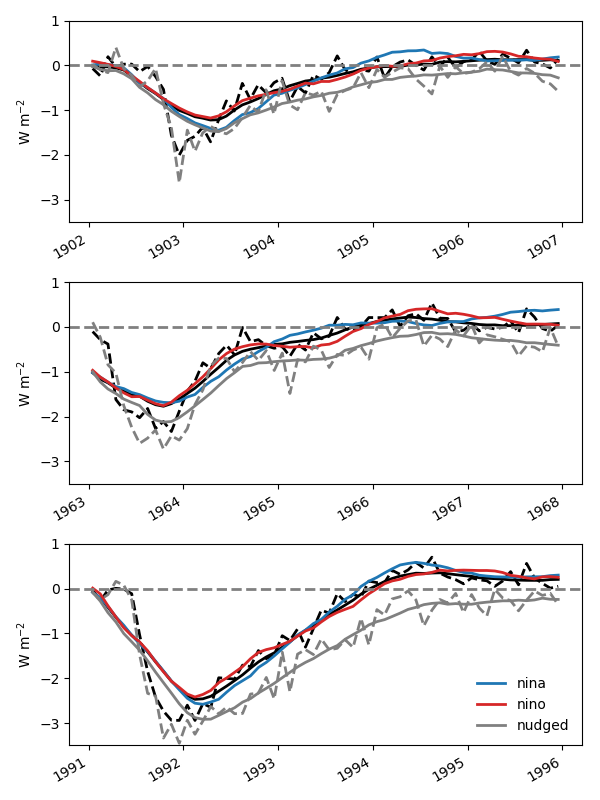

In [96]:
# plot
fig, axes = plt.subplots(3, 1, figsize=(6, 8), sharey=True)
dataname = 'netrad_toa'
units = 'W m$^{-2}$'

ax = axes[0]
volc = 'StMaria'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
da.mean('en').plot(color='k', ls='--', ax=ax)
da.rolling(time=12, center=True, min_periods=1).mean() \
    .mean('en').plot(color='k', ax=ax)
da.rolling(time=12, center=True, min_periods=1).mean() \
    .sel(en=nina_ens).mean('en').plot(color='C0', ax=ax)
da.rolling(time=12, center=True, min_periods=1).mean() \
    .sel(en=nino_ens).mean('en').plot(color='C3', ax=ax)

keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = das[keyv] - das[keyc]
da.mean('en').plot(color='gray', ls='--', ax=ax)
da.rolling(time=12, center=True, min_periods=1).mean() \
    .mean('en').plot(color='gray', ax=ax)

# ax.set_ylim(-3.5, 1)
ax.axhline(0, ls='--', color='gray')
ax.set_xlabel('')
ax.set_ylabel(units)

ax = axes[1]
volc = 'Agung'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
da.mean('en').plot(color='k', ls='--', ax=ax)
da.rolling(time=12, center=True, min_periods=1).mean() \
    .mean('en').plot(color='k', ax=ax)
da.rolling(time=12, center=True, min_periods=1).mean() \
    .sel(en=nina_ens).mean('en').plot(color='C0', ax=ax)
da.rolling(time=12, center=True, min_periods=1).mean() \
    .sel(en=nino_ens).mean('en').plot(color='C3', ax=ax)

keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = das[keyv] - das[keyc]
da.mean('en').plot(color='gray', ls='--', ax=ax)
da.rolling(time=12, center=True, min_periods=1).mean().mean('en').plot(color='gray', ax=ax)

# ax.set_ylim(-3.5, 1)
ax.axhline(0, ls='--', color='gray')
ax.set_xlabel('')
ax.set_ylabel(units)

ax = axes[2]
volc = 'Pinatubo'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
da.mean('en').plot(color='k', ls='--', ax=ax)
da.rolling(time=12, center=True, min_periods=1).mean() \
    .mean('en').plot(color='k', ax=ax)
da.rolling(time=12, center=True, min_periods=1).mean() \
    .sel(en=nina_ens).mean('en').plot(color='C0', ax=ax, label='nina')
da.rolling(time=12, center=True, min_periods=1).mean() \
    .sel(en=nino_ens).mean('en').plot(color='C3', ax=ax, label='nino')

keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = das[keyv] - das[keyc]
da.mean('en').plot(color='gray', ls='--', ax=ax)
da.rolling(time=12, center=True, min_periods=1).mean().mean('en').plot(color='gray', ax=ax, label='nudged')

# ax.set_ylim(-3.5, 1)
ax.axhline(0, ls='--', color='gray')
ax.set_xlabel('')
ax.set_ylabel(units)
ax.legend()
ax.set_ylim(-3.5, 1)

plt.tight_layout()

figname = f'figs/fig_{dataname}.pdf'
plt.savefig(figname)

## t_surf

In [196]:
# data
dataname = 't_surf'
volcs = ['Agung', 'StMaria', 'Pinatubo']
years = [1963, 1902, 1991]

# volc
ifiles = [f'data/{volc}_PI_ens_noleap.atmos_month.{dataname}.nc'
         for volc in volcs]
for volc, ifile in zip(volcs, ifiles):
    key = f'{volc}_{dataname}'
    print(key)
    da = xr.open_dataarray(ifile).geo.fldmean()
    das[key] = da
    
    # NH 
    key_ = key + '_nh'
    print(key_)
    da = xr.open_dataarray(ifile).sel(lat=slice(0,90)).geo.fldmean()
    das[key_] = da
    
    # SH
    key_ = key + '_sh'
    print(key_)
    da = xr.open_dataarray(ifile).sel(lat=slice(-90,0)).geo.fldmean()
    das[key_] = da

# ctl
ifile = f'data/CTL1860_noleap_tigercpu_intelmpi_18_576PE.atmos_month.{dataname}.nc'
for volc, year in zip(volcs, years):
    key = f'{volc}_ctl_{dataname}'
    print(key)
    da = xr.open_dataarray(ifile).geo.fldmean()
    da = year_shift(da, n=year-1, to_datetime=True)
    das[key] = da
    
    # NH 
    key_ = key + '_nh'
    print(key_)
    da = xr.open_dataarray(ifile).sel(lat=slice(0,90)).geo.fldmean()
    da = year_shift(da, n=year-1, to_datetime=True)
    das[key_] = da
    
    # SH
    key_ = key + '_sh'
    print(key_)
    da = xr.open_dataarray(ifile).sel(lat=slice(-90,0)).geo.fldmean()
    da = year_shift(da, n=year-1, to_datetime=True)
    das[key_] = da

# volc_nudge
ifiles = [f'data/{volc}_ens_noleap_nudgeclimo_all_model1860.atmos_month.{dataname}.nc'
         for volc in volcs]
for volc, ifile in zip(volcs, ifiles):
    key = f'{volc}_nudge_{dataname}'
    print(key)
    da = xr.open_dataarray(ifile).geo.fldmean()
    das[key] = da
    
    # NH 
    key_ = key + '_nh'
    print(key_)
    da = xr.open_dataarray(ifile).sel(lat=slice(0,90)).geo.fldmean()
    das[key_] = da
    
    # SH
    key_ = key + '_sh'
    print(key_)
    da = xr.open_dataarray(ifile).sel(lat=slice(-90,0)).geo.fldmean()
    das[key_] = da

# ctl_nudge
ifile = f'data/nudgeclimo_all_model_CTL1860_tigercpu_intelmpi_18_576PE.atmos_month.{dataname}.nc'
for volc, year in zip(volcs, years):
    key = f'{volc}_nudge_ctl_{dataname}'
    print(key)
    da = xr.open_dataarray(ifile).geo.fldmean()
    da = year_shift(da, n=year-1, to_datetime=True)
    das[key] = da
    
    # NH 
    key_ = key + '_nh'
    print(key_)
    da = xr.open_dataarray(ifile).sel(lat=slice(0,90)).geo.fldmean()
    da = year_shift(da, n=year-1, to_datetime=True)
    das[key_] = da
    
    # SH
    key_ = key + '_sh'
    print(key_)
    da = xr.open_dataarray(ifile).sel(lat=slice(-90,0)).geo.fldmean()
    da = year_shift(da, n=year-1, to_datetime=True)
    das[key_] = da

Agung_t_surf
Agung_t_surf_nh
Agung_t_surf_sh
StMaria_t_surf
StMaria_t_surf_nh
StMaria_t_surf_sh
Pinatubo_t_surf
Pinatubo_t_surf_nh
Pinatubo_t_surf_sh
Agung_ctl_t_surf


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Agung_ctl_t_surf_nh


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Agung_ctl_t_surf_sh


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


StMaria_ctl_t_surf


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


StMaria_ctl_t_surf_nh


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


StMaria_ctl_t_surf_sh


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Pinatubo_ctl_t_surf


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Pinatubo_ctl_t_surf_nh


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Pinatubo_ctl_t_surf_sh


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Agung_nudge_t_surf
Agung_nudge_t_surf_nh
Agung_nudge_t_surf_sh
StMaria_nudge_t_surf
StMaria_nudge_t_surf_nh
StMaria_nudge_t_surf_sh
Pinatubo_nudge_t_surf
Pinatubo_nudge_t_surf_nh
Pinatubo_nudge_t_surf_sh
Agung_nudge_ctl_t_surf


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Agung_nudge_ctl_t_surf_nh


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Agung_nudge_ctl_t_surf_sh


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


StMaria_nudge_ctl_t_surf


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


StMaria_nudge_ctl_t_surf_nh


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


StMaria_nudge_ctl_t_surf_sh


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Pinatubo_nudge_ctl_t_surf


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Pinatubo_nudge_ctl_t_surf_nh


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Pinatubo_nudge_ctl_t_surf_sh


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


<IPython.core.display.Javascript object>


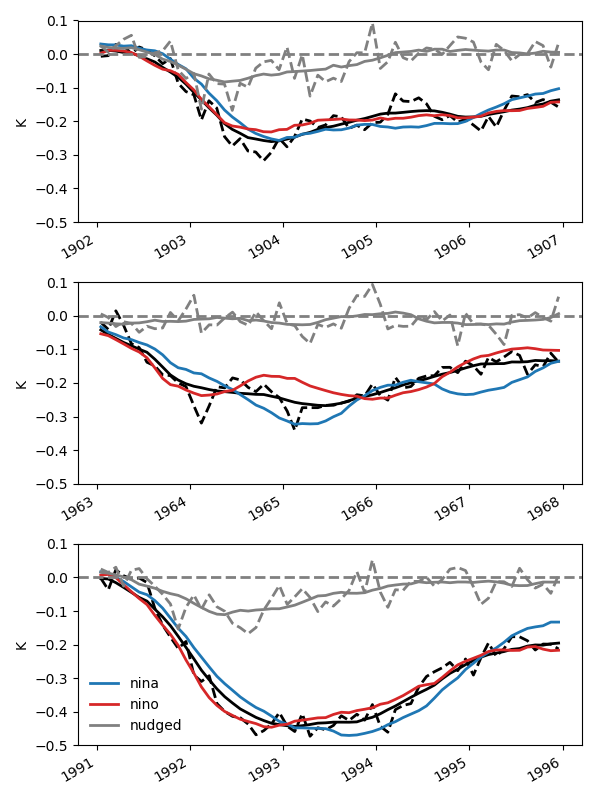

In [151]:
# plot
fig, axes = plt.subplots(3, 1, figsize=(6, 8), sharey=True)
dataname = 't_surf'
units = 'K'

ax = axes[0]
volc = 'StMaria'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
da.mean('en').plot(color='k', ls='--', ax=ax)
da.rolling(time=12, center=True, min_periods=1).mean() \
    .mean('en').plot(color='k', ax=ax)
da.rolling(time=12, center=True, min_periods=1).mean() \
    .sel(en=nina_ens).mean('en').plot(color='C0', ax=ax, label='nina')
da.rolling(time=12, center=True, min_periods=1).mean() \
    .sel(en=nino_ens).mean('en').plot(color='C3', ax=ax, label='nino')

keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = das[keyv] - das[keyc]
da.mean('en').plot(color='gray', ls='--', ax=ax)
da.rolling(time=12, center=True, min_periods=1).mean().mean('en').plot(color='gray', ax=ax)

# ax.set_ylim(-3.5, 1)
ax.axhline(0, ls='--', color='gray')
ax.set_xlabel('')
ax.set_ylabel(units)

ax = axes[1]
volc = 'Agung'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
da.mean('en').plot(color='k', ls='--', ax=ax)
da.rolling(time=12, center=True, min_periods=1).mean() \
    .mean('en').plot(color='k', ax=ax)
da.rolling(time=12, center=True, min_periods=1).mean() \
    .sel(en=nina_ens).mean('en').plot(color='C0', ax=ax, label='nina')
da.rolling(time=12, center=True, min_periods=1).mean() \
    .sel(en=nino_ens).mean('en').plot(color='C3', ax=ax, label='nino')

keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = das[keyv] - das[keyc]
da.mean('en').plot(color='gray', ls='--', ax=ax)
da.rolling(time=12, center=True, min_periods=1).mean().mean('en').plot(color='gray', ax=ax)

# ax.set_ylim(-3.5, 1)
ax.axhline(0, ls='--', color='gray')
ax.set_xlabel('')
ax.set_ylabel(units)

ax = axes[2]
volc = 'Pinatubo'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
da.mean('en').plot(color='k', ls='--', ax=ax)
da.rolling(time=12, center=True, min_periods=1).mean() \
    .mean('en').plot(color='k', ax=ax)
da.rolling(time=12, center=True, min_periods=1).mean() \
    .sel(en=nina_ens).mean('en').plot(color='C0', ax=ax, label='nina')
da.rolling(time=12, center=True, min_periods=1).mean() \
    .sel(en=nino_ens).mean('en').plot(color='C3', ax=ax, label='nino')

keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = das[keyv] - das[keyc]
da.mean('en').plot(color='gray', ls='--', ax=ax)
da.rolling(time=12, center=True, min_periods=1).mean().mean('en').plot(color='gray', ax=ax, label='nudged')

# ax.set_ylim(-3.5, 1)
ax.axhline(0, ls='--', color='gray')
ax.set_xlabel('')
ax.set_ylabel(units)
ax.legend()
ax.set_ylim(-.5, .1)

plt.tight_layout()

figname = f'figs/fig_{dataname}.pdf'
plt.savefig(figname)

## netrad_toa vs t_surf

t_surf integrated vs. netrad_toa integrated

<IPython.core.display.Javascript object>


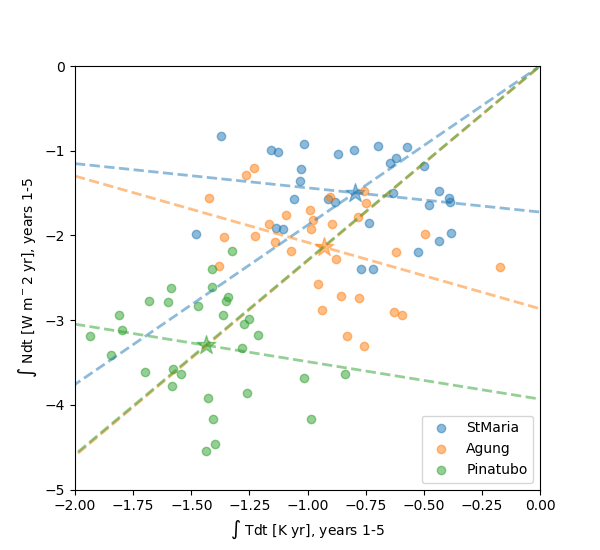

In [144]:
# plot
fig, ax = plt.subplots(figsize=(6, 5.5))
alpha = .5
n_years = 5
xmin, xmax = -2, 0

volc = 'StMaria'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
dax = da.isel(time=slice(0, n_years*12)).sum('time')/12

dataname = 'netrad_toa'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
day = da.isel(time=slice(0, n_years*12)).sum('time')/12

plt.scatter(dax, day, label=volc, color='C0', alpha=alpha)
plt.scatter(dax.mean(), day.mean(), marker='*', color='C0', s=200, alpha=alpha)
plt.plot([dax.mean()*3, 0], [day.mean()*3, 0], ls='--', color='C0', alpha=alpha)
beta = day.learn.regress(dax).coef_.item()
plt.plot([xmin, xmax], 
         [day.mean() + beta*(xmin - dax.mean()), day.mean() + beta*(xmax - dax.mean())], 
         color='C0', alpha=alpha, ls='--')

volc = 'Agung'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
dax = da.isel(time=slice(0, n_years*12)).sum('time')/12

dataname = 'netrad_toa'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
day = da.isel(time=slice(0, n_years*12)).sum('time')/12

plt.scatter(dax, day, label=volc, color='C1', alpha=alpha)
plt.scatter(dax.mean(), day.mean(), marker='*', color='C1', s=200, alpha=alpha)
plt.plot([dax.mean()*3, 0], [day.mean()*3, 0], ls='--', color='C1', alpha=alpha)
beta = day.learn.regress(dax).coef_.item()
plt.plot([xmin, xmax], 
         [day.mean() + beta*(xmin - dax.mean()), day.mean() + beta*(xmax - dax.mean())], 
         color='C1', alpha=alpha, ls='--')

volc = 'Pinatubo'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
dax = da.isel(time=slice(0, n_years*12)).sum('time')/12

dataname = 'netrad_toa'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
day = da.isel(time=slice(0, n_years*12)).sum('time')/12

plt.scatter(dax, day, label=volc, color='C2', alpha=alpha)
plt.scatter(dax.mean(), day.mean(), marker='*', color='C2', s=200, alpha=alpha)
plt.plot([dax.mean()*3, 0], [day.mean()*3, 0], ls='--', color='C2', alpha=alpha)
beta = day.learn.regress(dax).coef_.item()
plt.plot([xmin, xmax], 
         [day.mean() + beta*(xmin - dax.mean()), day.mean() + beta*(xmax - dax.mean())], 
         color='C2', alpha=alpha, ls='--')

ax.set_xlim(-2, 0)
ax.set_ylim(-5, 0)
ax.set_xlabel(f'$\int$ Tdt [K yr], years 1-{n_years}')
ax.set_ylabel(f'$\int$ Ndt [W m$^{-2}$ yr], years 1-{n_years}')
plt.legend(frameon=True, loc='lower right')
# ax.set_title(f'{n_years} years')

figname = f'figs/fig_scatter_Ts_vs_N_years1to{n_years}.pdf'
plt.savefig(figname)

t_surf  vs. netrad_toa  integrated

<IPython.core.display.Javascript object>


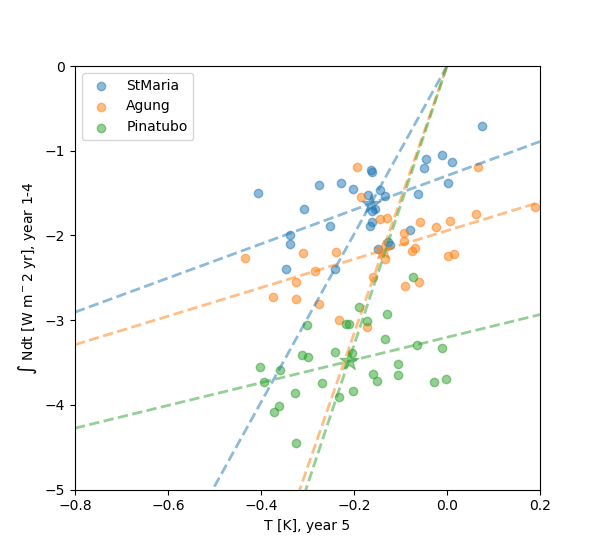

In [140]:
# plot
fig, ax = plt.subplots(figsize=(6, 5.5))
alpha = .5
n_years = 4
xmin, xmax = -.8, .2

volc = 'StMaria'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
dax = da.isel(time=slice(n_years*12, n_years*12+12)).mean('time')

dataname = 'netrad_toa'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
day = da.isel(time=slice(0, n_years*12)).sum('time')/12

plt.scatter(dax, day, label=volc, color='C0', alpha=alpha)
plt.scatter(dax.mean(), day.mean(), marker='*', color='C0', s=200, alpha=alpha)
plt.plot([dax.mean()*5, 0], [day.mean()*5, 0], ls='--', color='C0', alpha=alpha)
beta = day.learn.regress(dax).coef_.item()
plt.plot([xmin, xmax], 
         [day.mean() + beta*(xmin - dax.mean()), day.mean() + beta*(xmax - dax.mean())], 
         color='C0', alpha=alpha, ls='--')

volc = 'Agung'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
dax = da.isel(time=slice(n_years*12, n_years*12+12)).mean('time')

dataname = 'netrad_toa'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
day = da.isel(time=slice(0, n_years*12)).sum('time')/12

plt.scatter(dax, day, label=volc, color='C1', alpha=alpha)
plt.scatter(dax.mean(), day.mean(), marker='*', color='C1', s=200, alpha=alpha)
plt.plot([dax.mean()*5, 0], [day.mean()*5, 0], ls='--', color='C1', alpha=alpha)
beta = day.learn.regress(dax).coef_.item()
plt.plot([xmin, xmax], 
         [day.mean() + beta*(xmin - dax.mean()), day.mean() + beta*(xmax - dax.mean())], 
         color='C1', alpha=alpha, ls='--')

volc = 'Pinatubo'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
dax = da.isel(time=slice(n_years*12, n_years*12+12)).mean('time')

dataname = 'netrad_toa'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
day = da.isel(time=slice(0, n_years*12)).sum('time')/12

plt.scatter(dax, day, label=volc, color='C2', alpha=alpha)
plt.scatter(dax.mean(), day.mean(), marker='*', color='C2', s=200, alpha=alpha)
plt.plot([dax.mean()*5, 0], [day.mean()*5, 0], ls='--', color='C2', alpha=alpha)
beta = day.learn.regress(dax).coef_.item()
plt.plot([xmin, xmax], 
         [day.mean() + beta*(xmin - dax.mean()), day.mean() + beta*(xmax - dax.mean())], 
         color='C2', alpha=alpha, ls='--')

ax.set_xlim(xmin, xmax)
ax.set_ylim(-5, 0)
ax.set_xlabel(f'T [K], year {n_years+1}')
ax.set_ylabel(f'$\int$ Ndt [W m$^{-2}$ yr], year 1-{n_years}')
plt.legend(frameon=True, loc='upper left')
# ax.set_title(f'{n_years} years')

figname = f'figs/fig_scatter_Ts{n_years+1}_vs_N1to{n_years}.pdf'
plt.savefig(figname)

F-N integrated vs. T integrated

<IPython.core.display.Javascript object>


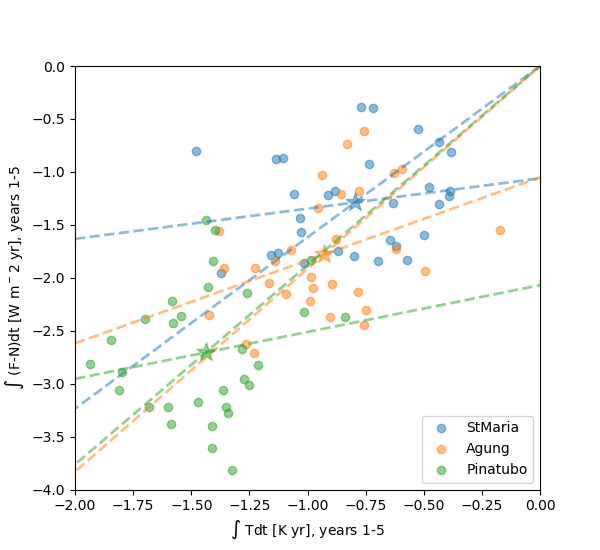

beta StMaria <xarray.DataArray ()>
array(1.6184510258773708)
beta Agung <xarray.DataArray ()>
array(1.9160061814978755)
beta Pinatubo <xarray.DataArray ()>
array(1.8820725516049526)


In [150]:
# plot
fig, ax = plt.subplots(figsize=(6, 5.5))
alpha = .5
n_years = 5
xmin, xmax = -2, 0

volc = 'StMaria'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
dax = da.isel(time=slice(0, n_years*12)).sum('time')/12

dataname = 'netrad_toa'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = (das[keyv] - das[keyc]).mean('en') - da
day = da.isel(time=slice(0, n_years*12)).sum('time')/12

plt.scatter(dax, day, label=volc, color='C0', alpha=alpha)
plt.scatter(dax.mean(), day.mean(), marker='*', color='C0', s=200, alpha=alpha)
print('beta', volc, day.mean()/dax.mean())
plt.plot([dax.mean()*3, 0], [day.mean()*3, 0], ls='--', color='C0', alpha=alpha)
beta = day.learn.regress(dax).coef_.item()
plt.plot([xmin, xmax], 
         [day.mean() + beta*(xmin - dax.mean()), day.mean() + beta*(xmax - dax.mean())], 
         color='C0', alpha=alpha, ls='--')

volc = 'Agung'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
dax = da.isel(time=slice(0, n_years*12)).sum('time')/12

dataname = 'netrad_toa'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = (das[keyv] - das[keyc]).mean('en') - da
day = da.isel(time=slice(0, n_years*12)).sum('time')/12

plt.scatter(dax, day, label=volc, color='C1', alpha=alpha)
plt.scatter(dax.mean(), day.mean(), marker='*', color='C1', s=200, alpha=alpha)
print('beta', volc, day.mean()/dax.mean())
plt.plot([dax.mean()*3, 0], [day.mean()*3, 0], ls='--', color='C1', alpha=alpha)
beta = day.learn.regress(dax).coef_.item()
plt.plot([xmin, xmax], 
         [day.mean() + beta*(xmin - dax.mean()), day.mean() + beta*(xmax - dax.mean())], 
         color='C1', alpha=alpha, ls='--')

volc = 'Pinatubo'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
dax = da.isel(time=slice(0, n_years*12)).sum('time')/12

dataname = 'netrad_toa'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = (das[keyv] - das[keyc]).mean('en') - da
day = da.isel(time=slice(0, n_years*12)).sum('time')/12

plt.scatter(dax, day, label=volc, color='C2', alpha=alpha)
plt.scatter(dax.mean(), day.mean(), marker='*', color='C2', s=200, alpha=alpha)
print('beta', volc, day.mean()/dax.mean())
plt.plot([dax.mean()*3, 0], [day.mean()*3, 0], ls='--', color='C2', alpha=alpha)
beta = day.learn.regress(dax).coef_.item()
plt.plot([xmin, xmax], 
         [day.mean() + beta*(xmin - dax.mean()), day.mean() + beta*(xmax - dax.mean())], 
         color='C2', alpha=alpha, ls='--')

ax.set_xlim(-2, 0)
ax.set_ylim(-4, 0)
ax.set_xlabel(f'$\int$ Tdt [K yr], years 1-{n_years}')
ax.set_ylabel(f'$\int$ (F-N)dt [W m$^{-2}$ yr], years 1-{n_years}')
plt.legend(frameon=True, loc='lower right')
# ax.set_title(f'{n_years} years')

figname = f'figs/fig_scatter_Ts_vs_FmN_years1to{n_years}.pdf'
plt.savefig(figname)

 < T > vs < F >

<IPython.core.display.Javascript object>


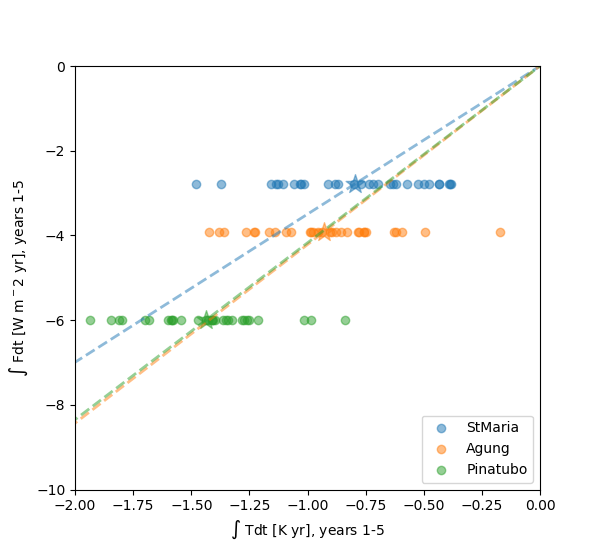

In [166]:
# plot
fig, ax = plt.subplots(figsize=(6, 5.5))
alpha = .5
n_years = 5
xmin, xmax = -2, 0

volc = 'StMaria'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
dax = da.isel(time=slice(0, n_years*12)).sum('time')/12

dataname = 'netrad_toa'
keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = (das[keyv] - das[keyc]).mean('en')
day = da.isel(time=slice(0, n_years*12)).sum('time')/12

plt.scatter(dax, [day,]*30, label=volc, color='C0', alpha=alpha)
plt.scatter(dax.mean(), day.mean(), marker='*', color='C0', s=200, alpha=alpha)
plt.plot([dax.mean()*3, 0], [day.mean()*3, 0], ls='--', color='C0', alpha=alpha)

volc = 'Agung'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
dax = da.isel(time=slice(0, n_years*12)).sum('time')/12

dataname = 'netrad_toa'
keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = (das[keyv] - das[keyc]).mean('en')
day = da.isel(time=slice(0, n_years*12)).sum('time')/12

plt.scatter(dax, [day,]*30, label=volc, color='C1', alpha=alpha)
plt.scatter(dax.mean(), day.mean(), marker='*', color='C1', s=200, alpha=alpha)
plt.plot([dax.mean()*3, 0], [day.mean()*3, 0], ls='--', color='C1', alpha=alpha)


volc = 'Pinatubo'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
dax = da.isel(time=slice(0, n_years*12)).sum('time')/12

dataname = 'netrad_toa'
keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = (das[keyv] - das[keyc]).mean('en')
day = da.isel(time=slice(0, n_years*12)).sum('time')/12

plt.scatter(dax, [day,]*30, label=volc, color='C2', alpha=alpha)
plt.scatter(dax.mean(), day.mean(), marker='*', color='C2', s=200, alpha=alpha)
plt.plot([dax.mean()*3, 0], [day.mean()*3, 0], ls='--', color='C2', alpha=alpha)

ax.set_xlim(-2, 0)
ax.set_ylim(-10, 0)
ax.set_xlabel(f'$\int$ Tdt [K yr], years 1-{n_years}')
ax.set_ylabel(f'$\int$ Fdt [W m$^{-2}$ yr], years 1-{n_years}')
plt.legend(frameon=True, loc='lower right')
# ax.set_title(f'{n_years} years')

figname = f'figs/fig_scatter_Ts_F_years1to{n_years}.pdf'
# plt.savefig(figname)

<IPython.core.display.Javascript object>


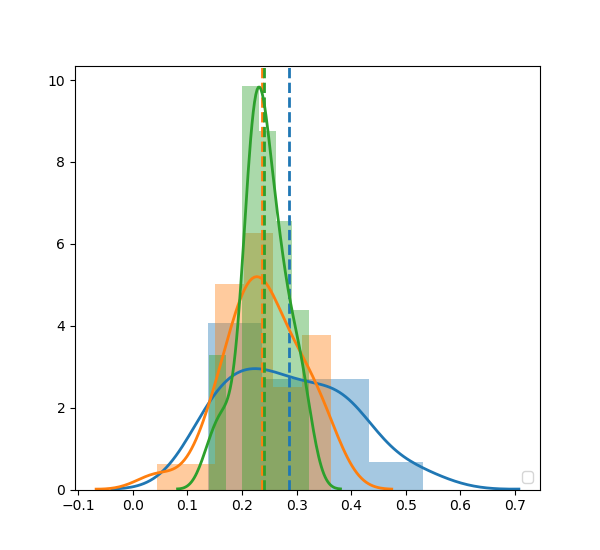

No handles with labels found to put in legend.


In [180]:
# plot
fig, ax = plt.subplots(figsize=(6, 5.5))
alpha = .5
n_years = 5
xmin, xmax = -2, 0

volc = 'StMaria'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
dax = da.isel(time=slice(0, n_years*12)).sum('time')/12

dataname = 'netrad_toa'
keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = (das[keyv] - das[keyc]).mean('en')
day = da.isel(time=slice(0, n_years*12)).sum('time')/12

sns.distplot(dax/day)
plt.axvline((dax/day).mean(), ls='--', color='C0')

volc = 'Agung'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
dax = da.isel(time=slice(0, n_years*12)).sum('time')/12

dataname = 'netrad_toa'
keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = (das[keyv] - das[keyc]).mean('en')
day = da.isel(time=slice(0, n_years*12)).sum('time')/12

sns.distplot(dax/day)
plt.axvline((dax/day).mean(), ls='--', color='C1')

volc = 'Pinatubo'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
dax = da.isel(time=slice(0, n_years*12)).sum('time')/12

dataname = 'netrad_toa'
keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = (das[keyv] - das[keyc]).mean('en')
day = da.isel(time=slice(0, n_years*12)).sum('time')/12

sns.distplot(dax/day)
plt.axvline((dax/day).mean(), ls='--', color='C2')

# ax.set_xlim(-2, 0)
# ax.set_ylim(-10, 0)
# ax.set_xlabel(f'$\int$ Tdt [K yr], years 1-{n_years}')
# ax.set_ylabel(f'$\int$ Fdt [W m$^{-2}$ yr], years 1-{n_years}')
plt.legend(frameon=True, loc='lower right')
# ax.set_title(f'{n_years} years')

figname = f'figs/fig_scatter_Ts_F_years1to{n_years}.pdf'
# plt.savefig(figname)

## Figs

### global mean series

<IPython.core.display.Javascript object>


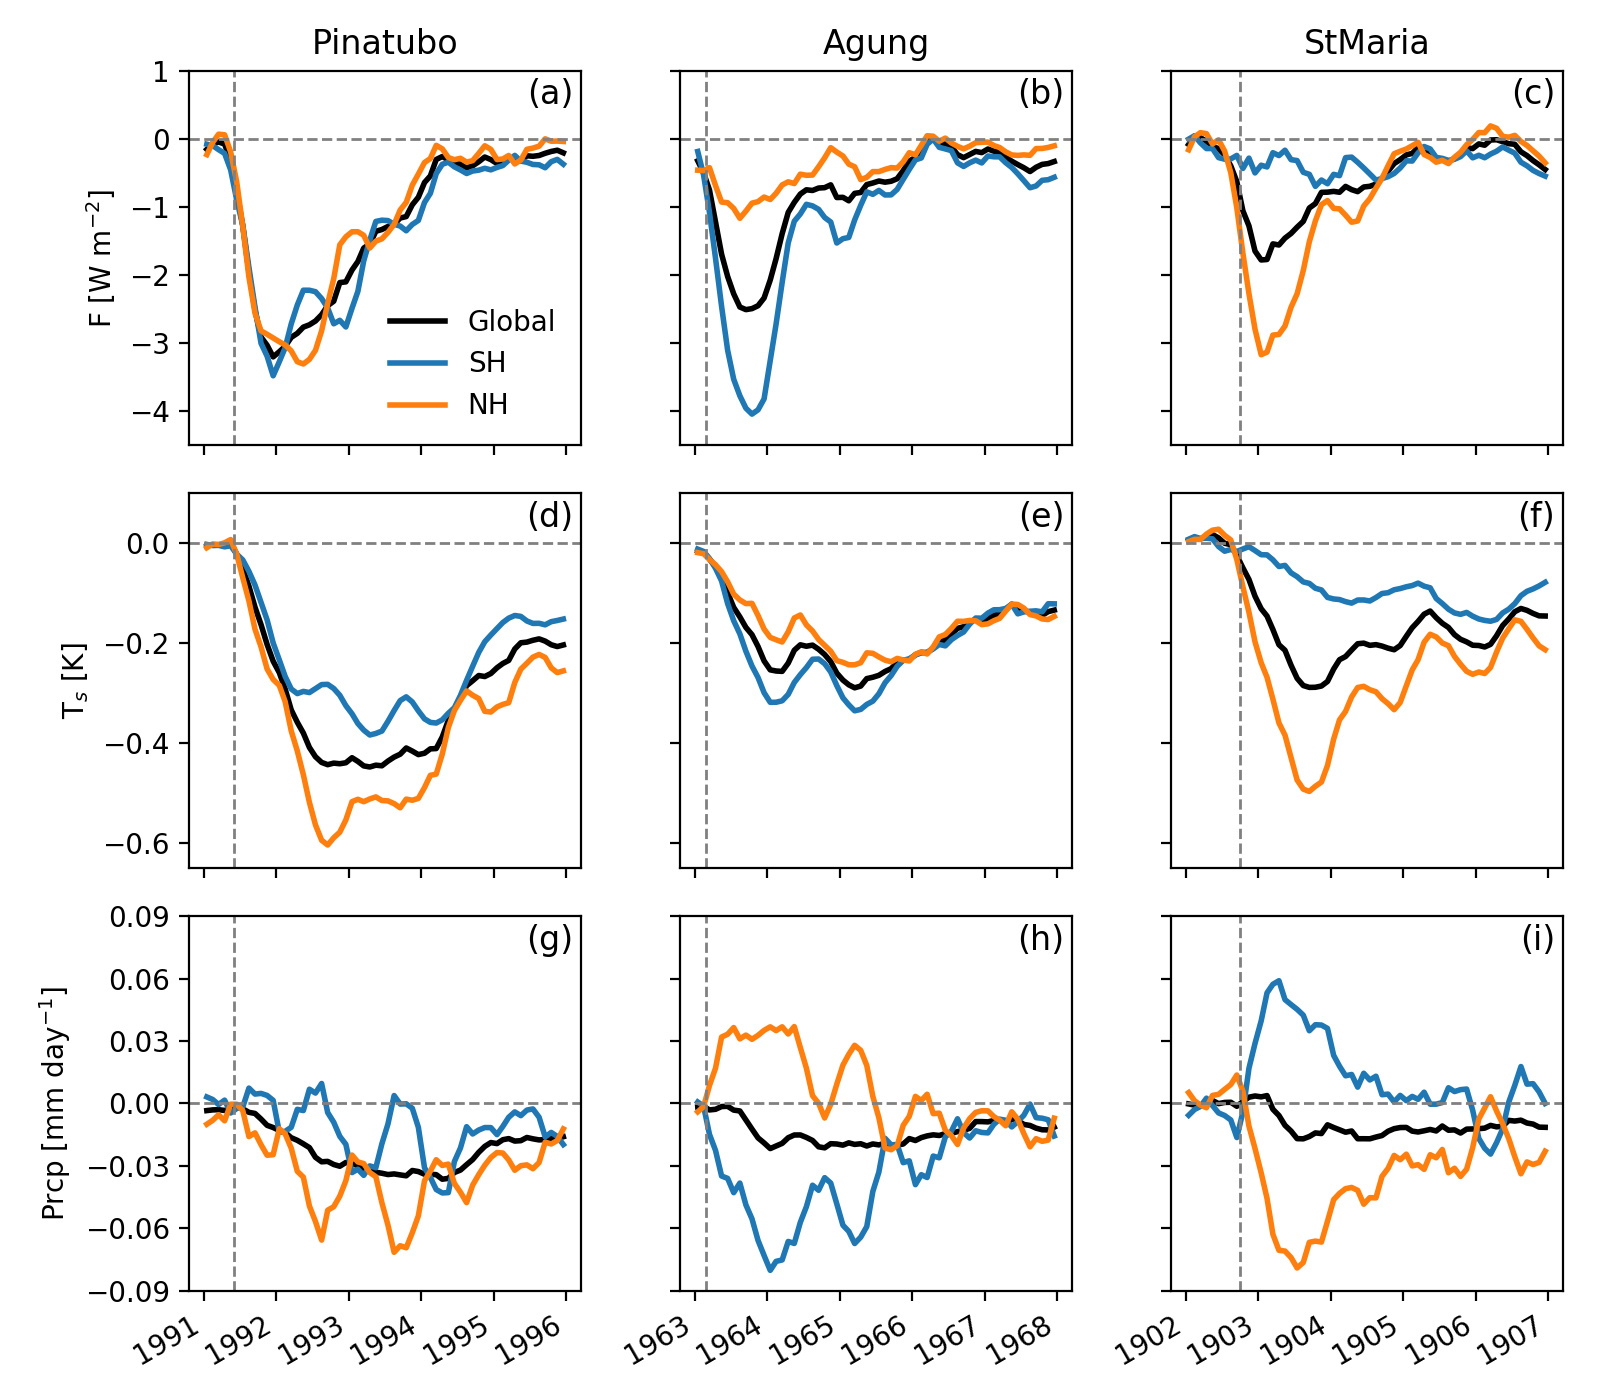

No handles with labels found to put in legend.


Pinatubo F NH/SH = 0.8769880629094432
Agung F NH/SH = 0.3368857606802807
StMaria F NH/SH = 2.3564818659764484


In [61]:
# plot
fig, axes = plt.subplots(3, 3, figsize=(8, 7), sharey='row', sharex='col')
n_running = 5
volc_dates = dict(StMaria=(1902, 10), Agung=(1963, 3), Pinatubo=(1991, 6))
axline = dict(color='gray', lw=1, ls='--')
textkw = dict(x=.98, y=.98, ha='right', va='top', fontsize='large')

# 
dataname = 'netrad_toa'
units = 'F [W m$^{-2}$]'
ylim = -4.5, 1
ax = axes[0, 0]
volc = 'Pinatubo'

keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = das[keyv] - das[keyc]
# da.mean('en').mean().plot(color='C1', ax=ax)
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='k', ax=ax,
                                                                             label='Global')
da = das[keyv+'_sh'] - das[keyc+'_sh']# SH
# da.mean('en').mean().plot(color='C1', ax=ax)
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='C0', ax=ax,
                                                                             label='SH')
da = das[keyv+'_nh'] - das[keyc+'_nh']# NH
# da.mean('en').mean().plot(color='C1', ax=ax)
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='C1', ax=ax,
                                                                             label='NH')
r = (das[keyv+'_nh'] - das[keyc+'_nh']).mean(['en', 'time'])/(das[keyv+'_sh'] - das[keyc+'_sh']).mean(['en', 'time'])
print(volc, 'F', 'NH/SH =', r.item())

ax.axhline(0, **axline)
ax.set_xlabel('')
ax.set_ylabel(units)
ax.set_title(volc)
yyyy, mm = volc_dates[volc]
ax.axvline(f'{yyyy}-{mm:02d}', **axline)
ax.text(s='(a)', transform=ax.transAxes, **textkw)
ax.legend()

ax = axes[0, 1]
volc = 'Agung'

keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = das[keyv] - das[keyc]
# da.mean('en').mean().plot(color='C1', ax=ax)
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='k', ax=ax)
da = das[keyv+'_sh'] - das[keyc+'_sh']# SH
# da.mean('en').mean().plot(color='C1', ax=ax)
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='C0', ax=ax)
da = das[keyv+'_nh'] - das[keyc+'_nh']# NH
# da.mean('en').mean().plot(color='C1', ax=ax)
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='C1', ax=ax)

r = (das[keyv+'_nh'] - das[keyc+'_nh']).mean(['en', 'time'])/(das[keyv+'_sh'] - das[keyc+'_sh']).mean(['en', 'time'])
print(volc, 'F', 'NH/SH =', r.item())

ax.axhline(0, **axline)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title(volc)
yyyy, mm = volc_dates[volc]
ax.axvline(f'{yyyy}-{mm:02d}', **axline)
ax.text(s='(b)', transform=ax.transAxes, **textkw)

ax = axes[0, 2]
volc = 'StMaria'

keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = das[keyv] - das[keyc]
# da.mean('en').mean().plot(color='C1', ax=ax)
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='k', ax=ax)
da = das[keyv+'_sh'] - das[keyc+'_sh']# SH
# da.mean('en').mean().plot(color='C1', ax=ax)
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='C0', ax=ax)
da = das[keyv+'_nh'] - das[keyc+'_nh']# NH
# da.mean('en').mean().plot(color='C1', ax=ax)
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='C1', ax=ax)

r = (das[keyv+'_nh'] - das[keyc+'_nh']).mean(['en', 'time'])/(das[keyv+'_sh'] - das[keyc+'_sh']).mean(['en', 'time'])
print(volc, 'F', 'NH/SH =', r.item())

ax.axhline(0, **axline)
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend()
ax.set_ylim(ylim)
ax.set_title(volc)
yyyy, mm = volc_dates[volc]
ax.axvline(f'{yyyy}-{mm:02d}', **axline)
ax.text(s='(c)', transform=ax.transAxes, **textkw)

#
dataname = 't_surf'
units = 'T$_s$ [K]'
ylim = -.65, .1
ax = axes[1, 0]
volc = 'Pinatubo'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
# da.mean('en').mean().plot(color='C1', ax=ax)
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='k', ax=ax)
da = das[keyv+'_sh'] - das[keyc+'_sh']# SH
# da.mean('en').mean().plot(color='C1', ax=ax)
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='C0', ax=ax)
da = das[keyv+'_nh'] - das[keyc+'_nh']# NH
# da.mean('en').mean().plot(color='C1', ax=ax)
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='C1', ax=ax)

ax.axhline(0, **axline)
ax.set_xlabel('')
ax.set_ylabel(units)
yyyy, mm = volc_dates[volc]
ax.axvline(f'{yyyy}-{mm:02d}', **axline)
ax.text(s='(d)', transform=ax.transAxes, **textkw)

ax = axes[1, 1]
volc = 'Agung'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
# da.mean('en').mean().plot(color='C1', ax=ax)
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='k', ax=ax)
da = das[keyv+'_sh'] - das[keyc+'_sh']# SH
# da.mean('en').mean().plot(color='C1', ax=ax)
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='C0', ax=ax)
da = das[keyv+'_nh'] - das[keyc+'_nh']# NH
# da.mean('en').mean().plot(color='C1', ax=ax)
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='C1', ax=ax)


ax.axhline(0, **axline)
ax.set_xlabel('')
ax.set_ylabel('')
yyyy, mm = volc_dates[volc]
ax.axvline(f'{yyyy}-{mm:02d}', **axline)
ax.text(s='(e)', transform=ax.transAxes, **textkw)

ax = axes[1, 2]
volc = 'StMaria'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
# da.mean('en').mean().plot(color='C1', ax=ax)
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='k', ax=ax)
da = das[keyv+'_sh'] - das[keyc+'_sh']# SH
# da.mean('en').mean().plot(color='C1', ax=ax)
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='C0', ax=ax)
da = das[keyv+'_nh'] - das[keyc+'_nh']# NH
# da.mean('en').mean().plot(color='C1', ax=ax)
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='C1', ax=ax)


ax.axhline(0, **axline)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_ylim(ylim)
yyyy, mm = volc_dates[volc]
ax.axvline(f'{yyyy}-{mm:02d}', **axline)
ax.text(s='(f)', transform=ax.transAxes, **textkw)

#
dataname = 'precip'
units = 'Prcp [mm day$^{-1}$]'
scale = 24*3600
ylim = -.09, .09
yticks = np.arange(-.09, .091, .03)

ax = axes[2, 0]
volc = 'Pinatubo'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
da = da*scale
# da.mean('en').mean().plot(color='C1', ax=ax)
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='k', ax=ax)
da = das[keyv+'_sh'] - das[keyc+'_sh']# SH
da = da*scale
# da.mean('en').mean().plot(color='C1', ax=ax)
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='C0', ax=ax)
da = das[keyv+'_nh'] - das[keyc+'_nh']# NH
da = da*scale
# da.mean('en').mean().plot(color='C1', ax=ax)
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='C1', ax=ax)

ax.axhline(0, **axline)
ax.set_xlabel('')
ax.set_ylabel(units)
ax.set_ylim(ylim)
ax.set_yticks(yticks)
yyyy, mm = volc_dates[volc]
ax.axvline(f'{yyyy}-{mm:02d}', **axline)
ax.text(s='(g)', transform=ax.transAxes, **textkw)

# #
ax = axes[2, 1]
volc = 'Agung'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
da = da*scale
# da.mean('en').mean().plot(color='C1', ax=ax)
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='k', ax=ax)
da = das[keyv+'_sh'] - das[keyc+'_sh']# SH
da = da*scale
# da.mean('en').mean().plot(color='C1', ax=ax)
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='C0', ax=ax)
da = das[keyv+'_nh'] - das[keyc+'_nh']# NH
da = da*scale
# da.mean('en').mean().plot(color='C1', ax=ax)
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='C1', ax=ax)

ax.axhline(0, **axline)
ax.set_xlabel('')
ax.set_ylabel('')
yyyy, mm = volc_dates[volc]
ax.axvline(f'{yyyy}-{mm:02d}', **axline)
ax.text(s='(h)', transform=ax.transAxes, **textkw)

# #
ax = axes[2, 2]
volc = 'StMaria'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
da = da*scale
# da.mean('en').mean().plot(color='C1', ax=ax)
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='k', ax=ax)
da = das[keyv+'_sh'] - das[keyc+'_sh']# SH
da = da*scale
# da.mean('en').mean().plot(color='C1', ax=ax)
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='C0', ax=ax)
da = das[keyv+'_nh'] - das[keyc+'_nh']# NH
da = da*scale
# da.mean('en').mean().plot(color='C1', ax=ax)
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='C1', ax=ax)

ax.axhline(0, **axline)
ax.set_xlabel('')
ax.set_ylabel('')
yyyy, mm = volc_dates[volc]
ax.axvline(f'{yyyy}-{mm:02d}', **axline)
ax.text(s='(i)', transform=ax.transAxes, **textkw)



plt.tight_layout()
# figname = f'figs/fig_series_FTP.pdf'
# plt.savefig(figname)

with spread

In [8]:
2.045/30**0.5

0.3733642100326882

<IPython.core.display.Javascript object>


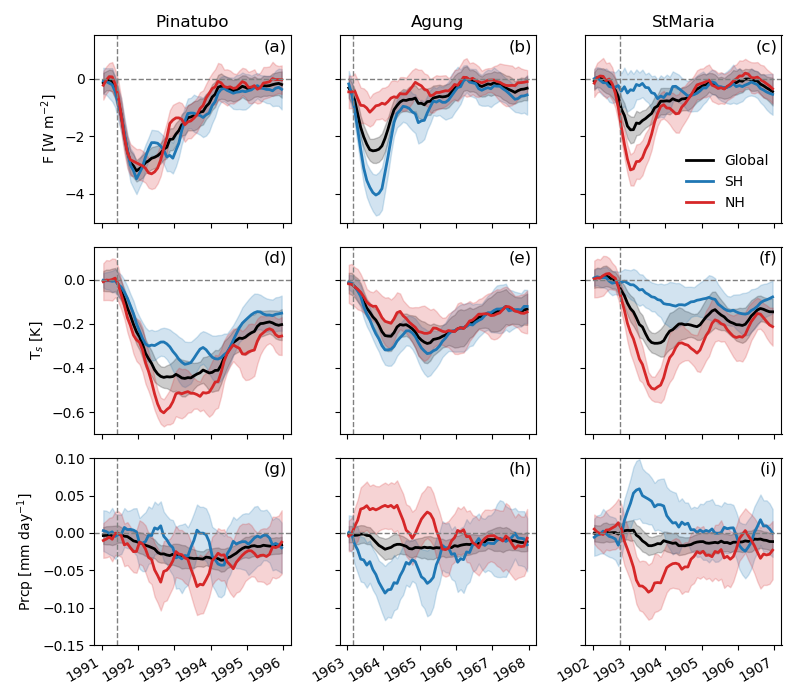

In [17]:
# plot
fig, axes = plt.subplots(3, 3, figsize=(8, 7), sharey='row', sharex='col')
n_running = 5
volc_dates = dict(StMaria=(1902, 10), Agung=(1963, 3), Pinatubo=(1991, 6))
axline = dict(color='gray', lw=1, ls='--')
textkw = dict(x=.98, y=.98, ha='right', va='top', fontsize='large')
alpha = .2

spread_scale_n10 = 2.045 / 10**0.5 # t value = 2.045 for 95% confidence interval, N=10
spread_scale = 2.045 / 30**0.5 # t value = 2.045 for 95% confidence interval, N=30
# 
dataname = 'netrad_toa'
units = 'F [W m$^{-2}$]'
# ylim = -4.5, 1
ylim = -5, 1.5
ax = axes[0, 0]
plt.sca(ax)
volc = 'Pinatubo'

keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = das[keyv] - das[keyc]
# spread
ts = da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean()
std = da.std('en').rolling(time=n_running, center=True, min_periods=1).mean() * spread_scale_n10
plt.fill_between(ts.time.to_index().to_pydatetime(), ts-std, ts+std, alpha=alpha, color='k')
# mean
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='k', ax=ax,
                                                                             label='Global')
da = das[keyv+'_sh'] - das[keyc+'_sh']# SH
# spread
ts = da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean()
std = da.std('en').rolling(time=n_running, center=True, min_periods=1).mean() * spread_scale_n10
plt.fill_between(ts.time.to_index().to_pydatetime(), ts-std, ts+std, alpha=alpha, color='C0')
# mean
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='C0', ax=ax,
                                                                             label='SH')
da = das[keyv+'_nh'] - das[keyc+'_nh']# NH
# spread
ts = da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean()
std = da.std('en').rolling(time=n_running, center=True, min_periods=1).mean() * spread_scale_n10
plt.fill_between(ts.time.to_index().to_pydatetime(), ts-std, ts+std, alpha=alpha, color='C3')
# mean
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='C3', ax=ax,
                                                                             label='NH')



ax.axhline(0, **axline)
ax.set_xlabel('')
ax.set_ylabel(units)
ax.set_title(volc)
yyyy, mm = volc_dates[volc]
ax.axvline(f'{yyyy}-{mm:02d}', **axline)
ax.text(s='(a)', transform=ax.transAxes, **textkw)

ax = axes[0, 1]
plt.sca(ax)
volc = 'Agung'

keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = das[keyv] - das[keyc]
# spread
ts = da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean()
std = da.std('en').rolling(time=n_running, center=True, min_periods=1).mean() * spread_scale_n10
plt.fill_between(ts.time.to_index().to_pydatetime(), ts-std, ts+std, alpha=alpha, color='k')
# mean
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='k', ax=ax)
da = das[keyv+'_sh'] - das[keyc+'_sh']# SH
# spread
ts = da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean()
std = da.std('en').rolling(time=n_running, center=True, min_periods=1).mean() * spread_scale_n10
plt.fill_between(ts.time.to_index().to_pydatetime(), ts-std, ts+std, alpha=alpha, color='C0')
# mean
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='C0', ax=ax)
da = das[keyv+'_nh'] - das[keyc+'_nh']# NH
# spread
ts = da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean()
std = da.std('en').rolling(time=n_running, center=True, min_periods=1).mean() * spread_scale_n10
plt.fill_between(ts.time.to_index().to_pydatetime(), ts-std, ts+std, alpha=alpha, color='C3')
# mean
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='C3', ax=ax)


ax.axhline(0, **axline)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title(volc)
yyyy, mm = volc_dates[volc]
ax.axvline(f'{yyyy}-{mm:02d}', **axline)
ax.text(s='(b)', transform=ax.transAxes, **textkw)

ax = axes[0, 2]
plt.sca(ax)
volc = 'StMaria'

keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = das[keyv] - das[keyc]
# spread
ts = da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean()
std = da.std('en').rolling(time=n_running, center=True, min_periods=1).mean() * spread_scale_n10
plt.fill_between(ts.time.to_index().to_pydatetime(), ts-std, ts+std, alpha=alpha, color='k')
# mean
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='k', ax=ax,
                                                                             label='Global')
da = das[keyv+'_sh'] - das[keyc+'_sh']# SH
# spread
ts = da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean()
std = da.std('en').rolling(time=n_running, center=True, min_periods=1).mean() * spread_scale_n10
plt.fill_between(ts.time.to_index().to_pydatetime(), ts-std, ts+std, alpha=alpha, color='C0')
# mean
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='C0', ax=ax,
                                                                             label='SH')
da = das[keyv+'_nh'] - das[keyc+'_nh']# NH
# spread
ts = da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean()
std = da.std('en').rolling(time=n_running, center=True, min_periods=1).mean() * spread_scale_n10
plt.fill_between(ts.time.to_index().to_pydatetime(), ts-std, ts+std, alpha=alpha, color='C3')
# mean
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='C3', ax=ax,
                                                                             label='NH')


ax.axhline(0, **axline)
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend(loc='lower right')
ax.set_ylim(ylim)
ax.set_title(volc)
yyyy, mm = volc_dates[volc]
ax.axvline(f'{yyyy}-{mm:02d}', **axline)
ax.text(s='(c)', transform=ax.transAxes, **textkw)

#
dataname = 't_surf'
units = 'T$_s$ [K]'
# ylim = -.65, .1
ylim = -0.7, 0.15
ax = axes[1, 0]
plt.sca(ax)
volc = 'Pinatubo'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
# spread
ts = da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean()
std = da.std('en').rolling(time=n_running, center=True, min_periods=1).mean() * spread_scale
plt.fill_between(ts.time.to_index().to_pydatetime(), ts-std, ts+std, alpha=alpha, color='k')
# mean
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='k', ax=ax)
da = das[keyv+'_sh'] - das[keyc+'_sh']# SH
# spread
ts = da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean()
std = da.std('en').rolling(time=n_running, center=True, min_periods=1).mean() * spread_scale
plt.fill_between(ts.time.to_index().to_pydatetime(), ts-std, ts+std, alpha=alpha, color='C0')
# mean
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='C0', ax=ax)
da = das[keyv+'_nh'] - das[keyc+'_nh']# NH
# spread
ts = da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean()
std = da.std('en').rolling(time=n_running, center=True, min_periods=1).mean() * spread_scale
plt.fill_between(ts.time.to_index().to_pydatetime(), ts-std, ts+std, alpha=alpha, color='C3')
# mean
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='C3', ax=ax)

ax.axhline(0, **axline)
ax.set_xlabel('')
ax.set_ylabel(units)
yyyy, mm = volc_dates[volc]
ax.axvline(f'{yyyy}-{mm:02d}', **axline)
ax.text(s='(d)', transform=ax.transAxes, **textkw)

ax = axes[1, 1]
plt.sca(ax)
volc = 'Agung'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
# spread
ts = da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean()
std = da.std('en').rolling(time=n_running, center=True, min_periods=1).mean() * spread_scale
plt.fill_between(ts.time.to_index().to_pydatetime(), ts-std, ts+std, alpha=alpha, color='k')
# mean
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='k', ax=ax)
da = das[keyv+'_sh'] - das[keyc+'_sh']# SH
# spread
ts = da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean()
std = da.std('en').rolling(time=n_running, center=True, min_periods=1).mean() * spread_scale
plt.fill_between(ts.time.to_index().to_pydatetime(), ts-std, ts+std, alpha=alpha, color='C0')
# mean
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='C0', ax=ax)
da = das[keyv+'_nh'] - das[keyc+'_nh']# NH
# spread
ts = da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean()
std = da.std('en').rolling(time=n_running, center=True, min_periods=1).mean() * spread_scale
plt.fill_between(ts.time.to_index().to_pydatetime(), ts-std, ts+std, alpha=alpha, color='C3')
# mean
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='C3', ax=ax)



ax.axhline(0, **axline)
ax.set_xlabel('')
ax.set_ylabel('')
yyyy, mm = volc_dates[volc]
ax.axvline(f'{yyyy}-{mm:02d}', **axline)
ax.text(s='(e)', transform=ax.transAxes, **textkw)

ax = axes[1, 2]
plt.sca(ax)
volc = 'StMaria'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
# spread
ts = da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean()
std = da.std('en').rolling(time=n_running, center=True, min_periods=1).mean() * spread_scale
plt.fill_between(ts.time.to_index().to_pydatetime(), ts-std, ts+std, alpha=alpha, color='k')
# mean
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='k', ax=ax)
da = das[keyv+'_sh'] - das[keyc+'_sh']# SH
# spread
ts = da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean()
std = da.std('en').rolling(time=n_running, center=True, min_periods=1).mean() * spread_scale
plt.fill_between(ts.time.to_index().to_pydatetime(), ts-std, ts+std, alpha=alpha, color='C0')
# mean
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='C0', ax=ax)
da = das[keyv+'_nh'] - das[keyc+'_nh']# NH
# spread
ts = da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean()
std = da.std('en').rolling(time=n_running, center=True, min_periods=1).mean() * spread_scale
plt.fill_between(ts.time.to_index().to_pydatetime(), ts-std, ts+std, alpha=alpha, color='C3')
# mean
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='C3', ax=ax)


ax.axhline(0, **axline)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_ylim(ylim)
yyyy, mm = volc_dates[volc]
ax.axvline(f'{yyyy}-{mm:02d}', **axline)
ax.text(s='(f)', transform=ax.transAxes, **textkw)

#
dataname = 'precip'
units = 'Prcp [mm day$^{-1}$]'
scale = 24*3600
ylim = -0.15, 0.1 #-.09, .09
yticks = np.arange(-0.2, 0.2, .05)#np.arange(-.09, .091, .03)

ax = axes[2, 0]
plt.sca(ax)
volc = 'Pinatubo'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
da = da*scale
# spread
ts = da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean()
std = da.std('en').rolling(time=n_running, center=True, min_periods=1).mean() * spread_scale
plt.fill_between(ts.time.to_index().to_pydatetime(), ts-std, ts+std, alpha=alpha, color='k')
# mean
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='k', ax=ax)
da = das[keyv+'_sh'] - das[keyc+'_sh']# SH
da = da*scale
# spread
ts = da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean()
std = da.std('en').rolling(time=n_running, center=True, min_periods=1).mean() * spread_scale
plt.fill_between(ts.time.to_index().to_pydatetime(), ts-std, ts+std, alpha=alpha, color='C0')
# mean
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='C0', ax=ax)
da = das[keyv+'_nh'] - das[keyc+'_nh']# NH
da = da*scale
# spread
ts = da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean()
std = da.std('en').rolling(time=n_running, center=True, min_periods=1).mean() * spread_scale
plt.fill_between(ts.time.to_index().to_pydatetime(), ts-std, ts+std, alpha=alpha, color='C3')
# mean
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='C3', ax=ax)

ax.axhline(0, **axline)
ax.set_xlabel('')
ax.set_ylabel(units)
ax.set_ylim(ylim)
ax.set_yticks(yticks)
yyyy, mm = volc_dates[volc]
ax.axvline(f'{yyyy}-{mm:02d}', **axline)
ax.text(s='(g)', transform=ax.transAxes, **textkw)

# #
ax = axes[2, 1]
plt.sca(ax)
volc = 'Agung'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
da = da*scale
# spread
ts = da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean()
std = da.std('en').rolling(time=n_running, center=True, min_periods=1).mean() * spread_scale
plt.fill_between(ts.time.to_index().to_pydatetime(), ts-std, ts+std, alpha=alpha, color='k')
# mean
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='k', ax=ax)
da = das[keyv+'_sh'] - das[keyc+'_sh']# SH
da = da*scale
# spread
ts = da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean()
std = da.std('en').rolling(time=n_running, center=True, min_periods=1).mean() * spread_scale
plt.fill_between(ts.time.to_index().to_pydatetime(), ts-std, ts+std, alpha=alpha, color='C0')
# mean
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='C0', ax=ax)
da = das[keyv+'_nh'] - das[keyc+'_nh']# NH
da = da*scale
# spread
ts = da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean()
std = da.std('en').rolling(time=n_running, center=True, min_periods=1).mean() * spread_scale
plt.fill_between(ts.time.to_index().to_pydatetime(), ts-std, ts+std, alpha=alpha, color='C3')
# mean
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='C3', ax=ax)

ax.axhline(0, **axline)
ax.set_xlabel('')
ax.set_ylabel('')
yyyy, mm = volc_dates[volc]
ax.axvline(f'{yyyy}-{mm:02d}', **axline)
ax.text(s='(h)', transform=ax.transAxes, **textkw)

# #
ax = axes[2, 2]
plt.sca(ax)
volc = 'StMaria'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
da = da*scale
# spread
ts = da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean()
std = da.std('en').rolling(time=n_running, center=True, min_periods=1).mean() * spread_scale
plt.fill_between(ts.time.to_index().to_pydatetime(), ts-std, ts+std, alpha=alpha, color='k')
# mean
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='k', ax=ax)
da = das[keyv+'_sh'] - das[keyc+'_sh']# SH
da = da*scale
# spread
ts = da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean()
std = da.std('en').rolling(time=n_running, center=True, min_periods=1).mean() * spread_scale
plt.fill_between(ts.time.to_index().to_pydatetime(), ts-std, ts+std, alpha=alpha, color='C0')
# mean
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='C0', ax=ax)
da = das[keyv+'_nh'] - das[keyc+'_nh']# NH
da = da*scale
# spread
ts = da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean()
std = da.std('en').rolling(time=n_running, center=True, min_periods=1).mean() * spread_scale
plt.fill_between(ts.time.to_index().to_pydatetime(), ts-std, ts+std, alpha=alpha, color='C3')
# mean
da.mean('en').rolling(time=n_running, center=True, min_periods=1).mean().plot(color='C3', ax=ax)

ax.axhline(0, **axline)
ax.set_xlabel('')
ax.set_ylabel('')
yyyy, mm = volc_dates[volc]
ax.axvline(f'{yyyy}-{mm:02d}', **axline)
ax.text(s='(i)', transform=ax.transAxes, **textkw)



plt.tight_layout()
figname = f'figs/fig_series_FTP_withSpread.pdf'
plt.savefig(figname)

### scatter plot of N(F) vs. Ts

<IPython.core.display.Javascript object>


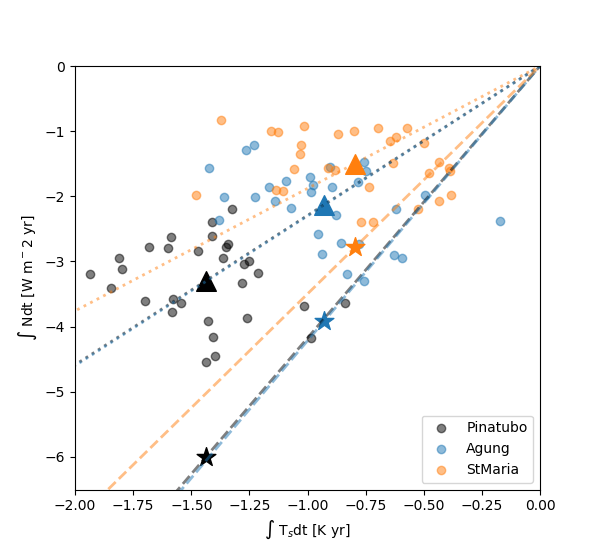

Pinatubo
sensitivity 0.23950577487447391 K/(W $^{-2}$)
beta 1.8820725516049504
lambda 2.2931921180010524

Agung
sensitivity 0.23714702813669605 K/(W $^{-2}$)
beta 1.9160061814978777
lambda 2.300787121193569

StMaria
sensitivity 0.2858715812985987 K/(W $^{-2}$)
beta 1.6184510258773708
lambda 1.8796231634401033



In [4]:
# plot
fig, ax = plt.subplots(figsize=(6, 5.5))
alpha = .5
n_years = 5
xmin, xmax = -2, 0
ymin, ymax = -6.5, 0

# 
volc = 'Pinatubo'
color = 'k'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
dax = da.isel(time=slice(0, n_years*12)).sum('time')/12

dataname = 'netrad_toa'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
day = da.isel(time=slice(0, n_years*12)).sum('time')/12
keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = (das[keyv] - das[keyc]).mean('en') 
dayF = da.isel(time=slice(0, n_years*12)).sum('time')/12

plt.scatter(dax, day, label=volc, color=color, alpha=alpha)
plt.scatter(dax.mean(), day.mean(), marker='^', color=color, s=200)
plt.scatter(dax.mean(), dayF, marker='*', color=color, s=200)
plt.plot([dax.mean()*5, 0], [dayF*5, 0], ls='--', color=color, alpha=alpha)
plt.plot([dax.mean()*5, 0], [day.mean()*5, 0], ls=':', color=color, alpha=alpha)
# plt.plot([dax.mean(), 0], [day.mean(), dayF], ls=':', color='C0', alpha=alpha)
print(volc)
print('sensitivity', dax.mean().item()/dayF.item(), 'K/(W $^{-2}$)')
print('beta', (dayF - day.mean()).item()/dax.mean().item())
print('lambda', day.mean().item()/dax.mean().item())
print()


# 
volc = 'Agung'
color = 'C0'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
dax = da.isel(time=slice(0, n_years*12)).sum('time')/12

dataname = 'netrad_toa'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
day = da.isel(time=slice(0, n_years*12)).sum('time')/12
keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = (das[keyv] - das[keyc]).mean('en') 
dayF = da.isel(time=slice(0, n_years*12)).sum('time')/12

plt.scatter(dax, day, label=volc, color=color, alpha=alpha)
plt.scatter(dax.mean(), day.mean(), marker='^', color=color, s=200)
plt.scatter(dax.mean(), dayF, marker='*', color=color, s=200)
plt.plot([dax.mean()*5, 0], [dayF*5, 0], ls='--', color=color, alpha=alpha)
plt.plot([dax.mean()*5, 0], [day.mean()*5, 0], ls=':', color=color, alpha=alpha)
# plt.plot([dax.mean(), 0], [day.mean(), dayF], ls=':', color='C0', alpha=alpha)
print(volc)
print('sensitivity', dax.mean().item()/dayF.item(), 'K/(W $^{-2}$)')
print('beta', (dayF - day.mean()).item()/dax.mean().item())
print('lambda', day.mean().item()/dax.mean().item())
print()


# 
volc = 'StMaria'
color = 'C1'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
dax = da.isel(time=slice(0, n_years*12)).sum('time')/12

dataname = 'netrad_toa'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
day = da.isel(time=slice(0, n_years*12)).sum('time')/12
keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = (das[keyv] - das[keyc]).mean('en')
dayF = da.isel(time=slice(0, n_years*12)).sum('time')/12

plt.scatter(dax, day, label=volc, color=color, alpha=alpha)
plt.scatter(dax.mean(), day.mean(), marker='^', color=color, s=200)
plt.scatter(dax.mean(), dayF, marker='*', color=color, s=200)
plt.plot([dax.mean()*5, 0], [dayF*5, 0], ls='--', color=color, alpha=alpha)
plt.plot([dax.mean()*5, 0], [day.mean()*5, 0], ls=':', color=color, alpha=alpha)
# plt.plot([dax.mean(), 0], [day.mean(), dayF], ls=':', color='C0', alpha=alpha)
print(volc)
print('sensitivity', dax.mean().item()/dayF.item(), 'K/(W $^{-2}$)')
print('beta', (dayF - day.mean()).item()/dax.mean().item())
print('lambda', day.mean().item()/dax.mean().item())
print()



ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
# ax.set_xlabel(f'$\int$ Tdt [K yr], years 1-{n_years}')
# ax.set_ylabel(f'$\int$ Ndt [W m$^{-2}$ yr], years 1-{n_years}')
ax.set_xlabel(f'$\int$ T$_s$dt [K yr]')
ax.set_ylabel(f'$\int$ Ndt [W m$^{-2}$ yr]')
plt.legend(frameon=True, loc='lower right')
# ax.set_title(f'{n_years} years')

figname = f'figs/fig_scatter_NF_vs_Ts_years1to{n_years}.pdf'
plt.savefig(figname)

<IPython.core.display.Javascript object>


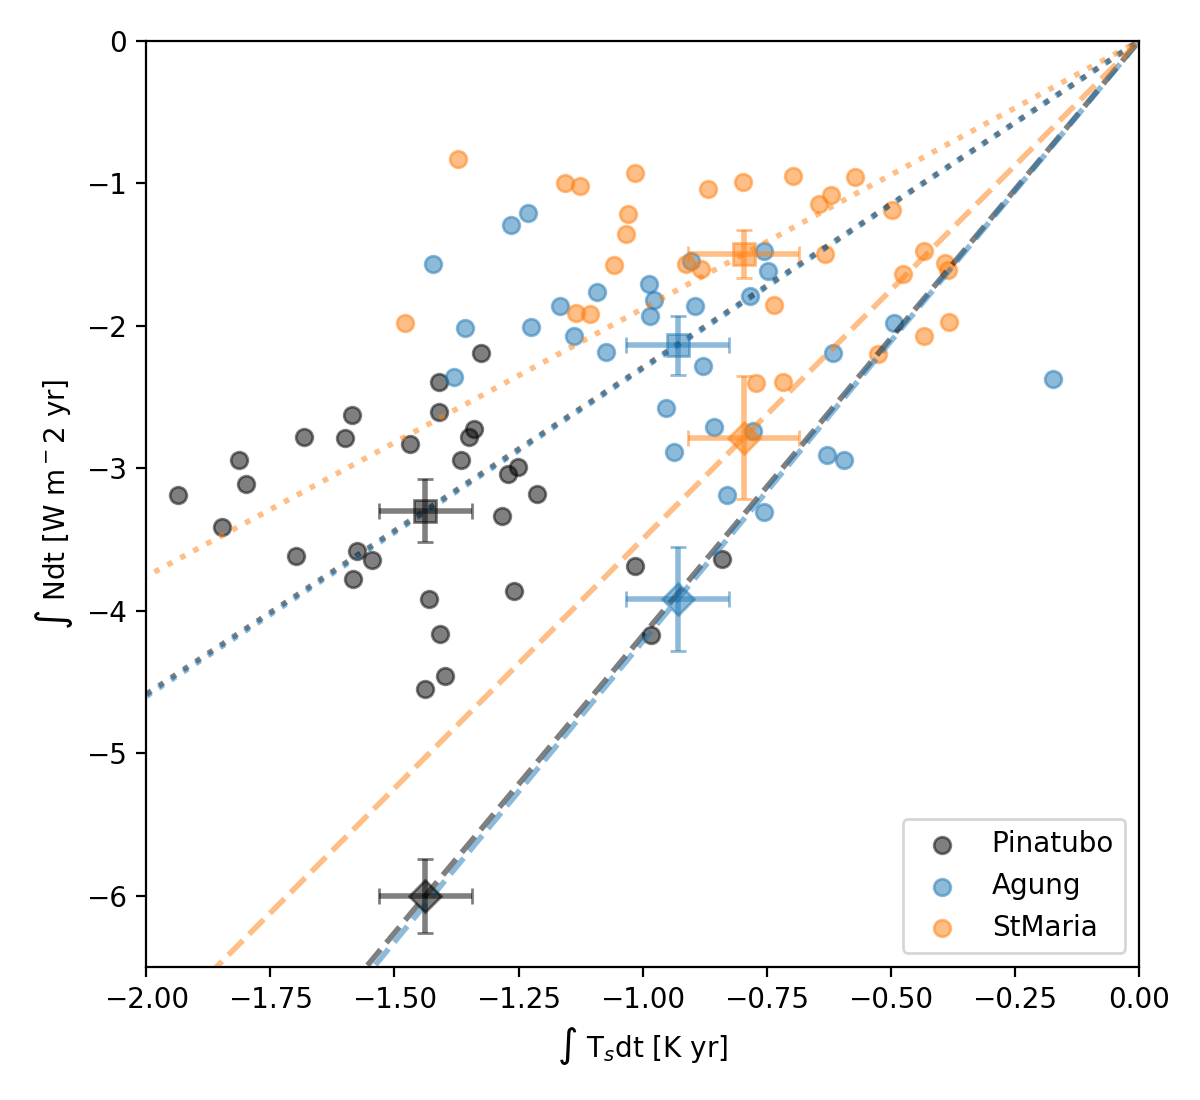

Pinatubo
sensitivity 0.23950577487447383 K/(W $^{-2}$)
beta 1.8820725516049523
lambda 2.293192118001052

Agung
sensitivity 0.23714702813669616 K/(W $^{-2}$)
beta 1.9160061814978757
lambda 2.300787121193569

StMaria
sensitivity 0.2858715812985988 K/(W $^{-2}$)
beta 1.6184510258773697
lambda 1.8796231634401033



In [58]:
# plot, revise 2 with 95% confidence interval
fig, ax = plt.subplots(figsize=(6, 5.5))
alpha = .5
n_years = 5
xmin, xmax = -2, 0
ymin, ymax = -6.5, 0
capsize = 3
marker = 's'
markersize = 8
Fmarker = 'D'
Fmarkersize = 8


# 
volc = 'Pinatubo'
color = 'k'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
dax = da.isel(time=slice(0, n_years*12)).sum('time')/12
xmean_err = p2t(0.05, dax.size-1) * dax.std() * (dax.size)**(-1/2)

dataname = 'netrad_toa'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
day = da.isel(time=slice(0, n_years*12)).sum('time')/12
ymean_err = p2t(0.05, day.size-1) * day.std() * (day.size)**(-1/2)
keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = (das[keyv] - das[keyc])#.mean('en') 
dayF = da.isel(time=slice(0, n_years*12)).sum('time')/12
Fmean_err = p2t(0.05, dayF.size-1) * dayF.std() * (dayF.size)**(-1/2)
dayF = dayF.mean('en')

plt.scatter(dax, day, label=volc, color=color, alpha=alpha)
# plt.scatter(dax.mean(), day.mean(), marker='^', color=color, s=200)
plt.errorbar(dax.mean(), day.mean(), 
             xerr=xmean_err, yerr=ymean_err, 
             color=color, marker=marker, ms=markersize, alpha=alpha, capsize=capsize)
plt.plot([dax.mean()*5, 0], [day.mean()*5, 0], ls=':', color=color, alpha=alpha)
# plt.scatter(dax.mean(), dayF, marker='*', color=color, s=200)
plt.errorbar(dax.mean(), dayF.mean(), 
             xerr=xmean_err, yerr=Fmean_err, 
             color=color, marker=Fmarker, ms=Fmarkersize, alpha=alpha, capsize=capsize)
plt.plot([dax.mean()*5, 0], [dayF*5, 0], ls='--', color=color, alpha=alpha)
print(volc)
print('sensitivity', dax.mean().item()/dayF.item(), 'K/(W $^{-2}$)')
print('beta', (dayF - day.mean()).item()/dax.mean().item())
print('lambda', day.mean().item()/dax.mean().item())
print()


# 
volc = 'Agung'
color = 'C0'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
dax = da.isel(time=slice(0, n_years*12)).sum('time')/12
xmean_err = p2t(0.05, dax.size-1) * dax.std() * (dax.size)**(-1/2)

dataname = 'netrad_toa'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
day = da.isel(time=slice(0, n_years*12)).sum('time')/12
ymean_err = p2t(0.05, day.size-1) * day.std() * (day.size)**(-1/2)
keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = (das[keyv] - das[keyc])#.mean('en') 
dayF = da.isel(time=slice(0, n_years*12)).sum('time')/12
Fmean_err = p2t(0.05, dayF.size-1) * dayF.std() * (dayF.size)**(-1/2)
dayF = dayF.mean('en')


plt.scatter(dax, day, label=volc, color=color, alpha=alpha)
plt.errorbar(dax.mean(), day.mean(), 
             xerr=xmean_err, yerr=ymean_err, 
             color=color, marker=marker, ms=markersize, alpha=alpha, capsize=capsize)
plt.plot([dax.mean()*5, 0], [day.mean()*5, 0], ls=':', color=color, alpha=alpha)
plt.errorbar(dax.mean(), dayF.mean(), 
             xerr=xmean_err, yerr=Fmean_err, 
             color=color, marker=Fmarker, ms=Fmarkersize, alpha=alpha, capsize=capsize)
plt.plot([dax.mean()*5, 0], [dayF*5, 0], ls='--', color=color, alpha=alpha)

print(volc)
print('sensitivity', dax.mean().item()/dayF.item(), 'K/(W $^{-2}$)')
print('beta', (dayF - day.mean()).item()/dax.mean().item())
print('lambda', day.mean().item()/dax.mean().item())
print()


# 
volc = 'StMaria'
color = 'C1'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
dax = da.isel(time=slice(0, n_years*12)).sum('time')/12
xmean_err = p2t(0.05, dax.size-1) * dax.std() * (dax.size)**(-1/2)

dataname = 'netrad_toa'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
day = da.isel(time=slice(0, n_years*12)).sum('time')/12
ymean_err = p2t(0.05, day.size-1) * day.std() * (day.size)**(-1/2)
keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = (das[keyv] - das[keyc])#.mean('en') 
dayF = da.isel(time=slice(0, n_years*12)).sum('time')/12
Fmean_err = p2t(0.05, dayF.size-1) * dayF.std() * (dayF.size)**(-1/2)
dayF = dayF.mean('en')



plt.scatter(dax, day, label=volc, color=color, alpha=alpha)
plt.errorbar(dax.mean(), day.mean(), 
             xerr=xmean_err, yerr=ymean_err, 
             color=color, marker=marker, ms=markersize, alpha=alpha, capsize=capsize)
plt.plot([dax.mean()*5, 0], [day.mean()*5, 0], ls=':', color=color, alpha=alpha)
plt.errorbar(dax.mean(), dayF.mean(), 
             xerr=xmean_err, yerr=Fmean_err, 
             color=color, marker=Fmarker, ms=Fmarkersize, alpha=alpha, capsize=capsize)
plt.plot([dax.mean()*5, 0], [dayF*5, 0], ls='--', color=color, alpha=alpha)
print(volc)
print('sensitivity', dax.mean().item()/dayF.item(), 'K/(W $^{-2}$)')
print('beta', (dayF - day.mean()).item()/dax.mean().item())
print('lambda', day.mean().item()/dax.mean().item())
print()



ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
# ax.set_xlabel(f'$\int$ Tdt [K yr], years 1-{n_years}')
# ax.set_ylabel(f'$\int$ Ndt [W m$^{-2}$ yr], years 1-{n_years}')
ax.set_xlabel(f'$\int$ T$_s$dt [K yr]')
ax.set_ylabel(f'$\int$ Ndt [W m$^{-2}$ yr]')
plt.legend(frameon=True, loc='lower right')
# ax.set_title(f'{n_years} years')

plt.tight_layout()
figname = f'figs/fig_scatter_NF_vs_Ts_years1to{n_years}_withSpread.pdf'
plt.savefig(figname)

<IPython.core.display.Javascript object>


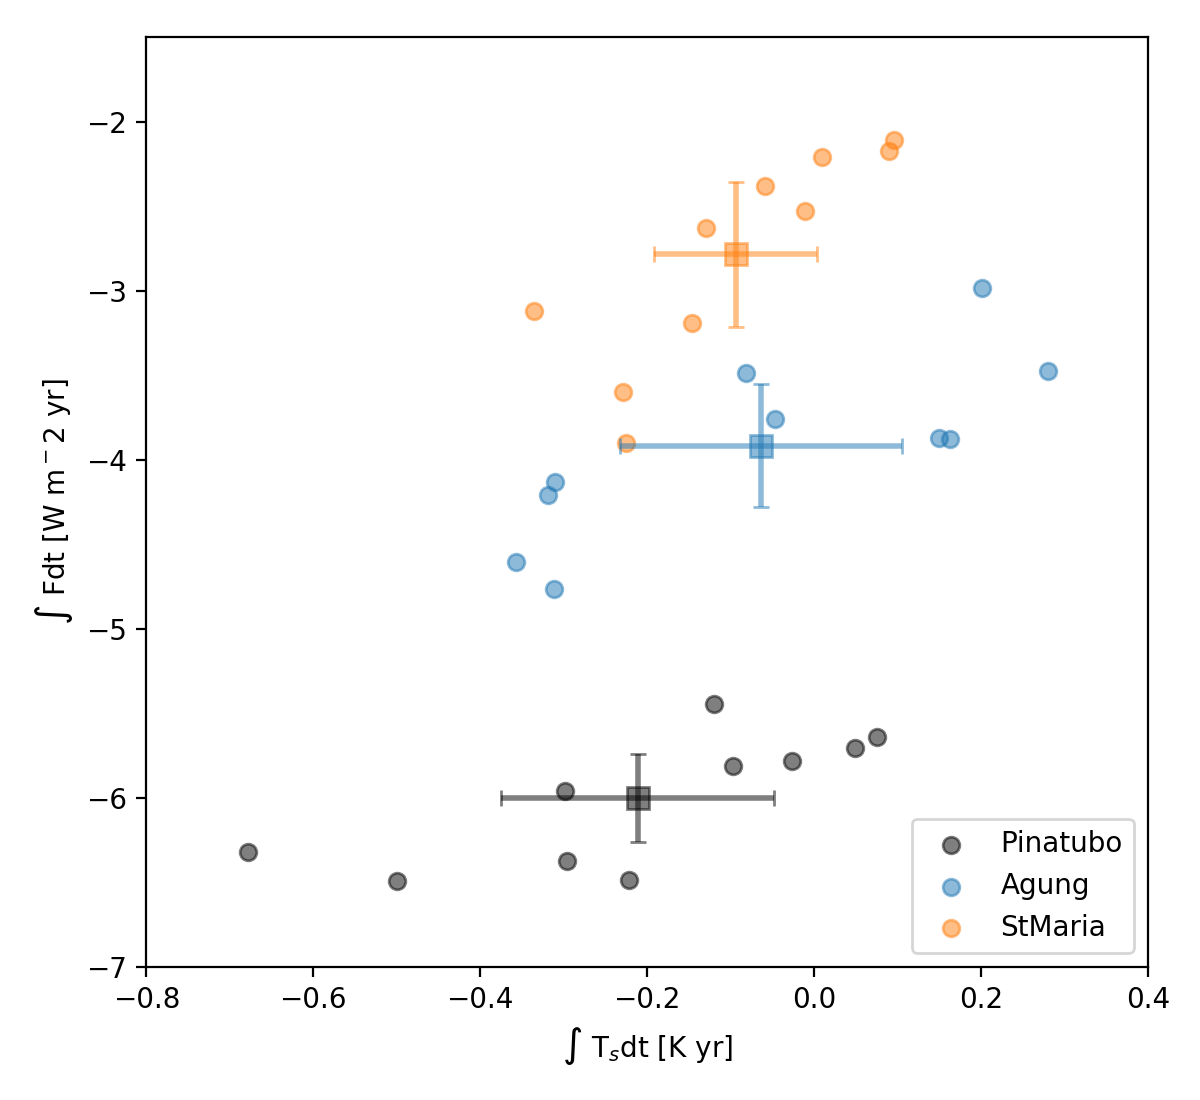

In [76]:
# plot, revise 2 with 95% confidence interval, pure nudged
fig, ax = plt.subplots(figsize=(6, 5.5))
alpha = .5
n_years = 5
xmin, xmax = -0.8, 0.4
ymin, ymax = -7, -1.5
capsize = 3
marker = 's'
markersize = 8
Fmarker = 'D'
Fmarkersize = 8


# 
volc = 'Pinatubo'
color = 'k'

dataname = 't_surf'
keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = das[keyv] - das[keyc]
dax = da.isel(time=slice(0, n_years*12)).sum('time')/12
xmean_err = p2t(0.05, dax.size-1) * dax.std() * (dax.size)**(-1/2)

dataname = 'netrad_toa'
keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = das[keyv] - das[keyc]
day = da.isel(time=slice(0, n_years*12)).sum('time')/12
ymean_err = p2t(0.05, day.size-1) * day.std() * (day.size)**(-1/2)

plt.scatter(dax, day, label=volc, color=color, alpha=alpha)
# plt.scatter(dax.mean(), day.mean(), marker='^', color=color, s=200)
plt.errorbar(dax.mean(), day.mean(), 
             xerr=xmean_err, yerr=ymean_err, 
             color=color, marker=marker, ms=markersize, alpha=alpha, capsize=capsize)
# plt.plot([dax.mean()*5, 0], [day.mean()*5, 0], ls=':', color=color, alpha=alpha)


# 
volc = 'Agung'
color = 'C0'

dataname = 't_surf'
keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = das[keyv] - das[keyc]
dax = da.isel(time=slice(0, n_years*12)).sum('time')/12
xmean_err = p2t(0.05, dax.size-1) * dax.std() * (dax.size)**(-1/2)

dataname = 'netrad_toa'
keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = das[keyv] - das[keyc]
day = da.isel(time=slice(0, n_years*12)).sum('time')/12
ymean_err = p2t(0.05, day.size-1) * day.std() * (day.size)**(-1/2)


plt.scatter(dax, day, label=volc, color=color, alpha=alpha)
plt.errorbar(dax.mean(), day.mean(), 
             xerr=xmean_err, yerr=ymean_err, 
             color=color, marker=marker, ms=markersize, alpha=alpha, capsize=capsize)
# plt.plot([dax.mean()*5, 0], [day.mean()*5, 0], ls=':', color=color, alpha=alpha)


# 
volc = 'StMaria'
color = 'C1'

dataname = 't_surf'
keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = das[keyv] - das[keyc]
dax = da.isel(time=slice(0, n_years*12)).sum('time')/12
xmean_err = p2t(0.05, dax.size-1) * dax.std() * (dax.size)**(-1/2)

dataname = 'netrad_toa'
keyv, keyc = f'{volc}_nudge_{dataname}', f'{volc}_nudge_ctl_{dataname}'
da = das[keyv] - das[keyc]
day = da.isel(time=slice(0, n_years*12)).sum('time')/12
ymean_err = p2t(0.05, day.size-1) * day.std() * (day.size)**(-1/2)



plt.scatter(dax, day, label=volc, color=color, alpha=alpha)
plt.errorbar(dax.mean(), day.mean(), 
             xerr=xmean_err, yerr=ymean_err, 
             color=color, marker=marker, ms=markersize, alpha=alpha, capsize=capsize)
# plt.plot([dax.mean()*5, 0], [day.mean()*5, 0], ls=':', color=color, alpha=alpha)


ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
# ax.set_xlabel(f'$\int$ Tdt [K yr], years 1-{n_years}')
# ax.set_ylabel(f'$\int$ Ndt [W m$^{-2}$ yr], years 1-{n_years}')
ax.set_xlabel(f'$\int$ T$_s$dt [K yr]')
ax.set_ylabel(f'$\int$ Fdt [W m$^{-2}$ yr]')
plt.legend(frameon=True, loc='lower right')
# ax.set_title(f'{n_years} years')

plt.tight_layout()
figname = f'figs/fig_scatter_F_vs_nudgedTs_years1to{n_years}_withSpread.pdf'
plt.savefig(figname)

### asymmetry index: Ts

<IPython.core.display.Javascript object>


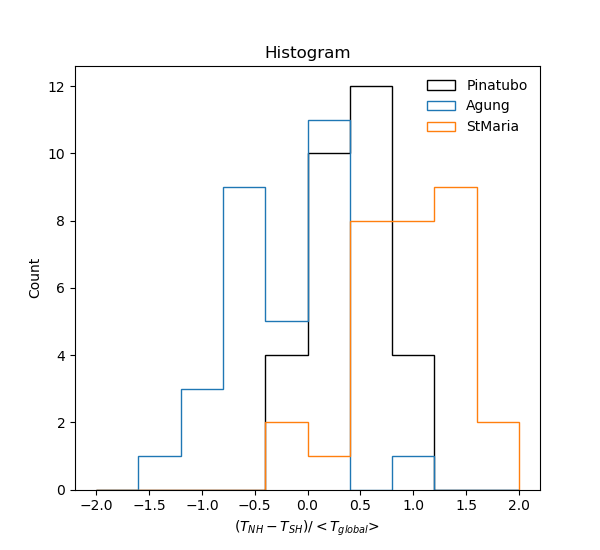

In [81]:
# plot
fig, ax = plt.subplots(figsize=(6, 5.5))
alpha = 1
n_years = 5
bins = np.arange(-2, 2.1, 0.4)
# xmin, xmax = -2, 0
# ymin, ymax = -6.5, 0
histtype = 'step'
stacked = False
# 
volc = 'Pinatubo'
color = 'k'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv] - das[keyc] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nh'] - das[keyc+'_nh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_sh'] - das[keyc+'_sh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = (da_nh - da_sh)/da.mean()

da.plot.hist(color=color, alpha=alpha, label=volc, bins=bins, histtype=histtype, stacked=stacked)

volc = 'Agung'
color = 'k'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv] - das[keyc] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nh'] - das[keyc+'_nh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_sh'] - das[keyc+'_sh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = (da_nh - da_sh)/da.mean()

da.plot.hist(alpha=alpha, label=volc, bins=bins, histtype=histtype, stacked=stacked)
# sns.distplot(da)


volc = 'StMaria'
color = 'k'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv] - das[keyc] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nh'] - das[keyc+'_nh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_sh'] - das[keyc+'_sh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = (da_nh - da_sh)/da.mean()

da.plot.hist(alpha=alpha, label=volc, bins=bins, histtype=histtype, stacked=stacked)
# sns.distplot(da)

ax.autoscale()
plt.legend()
s = '$(T_{NH} - T_{SH})/<T_{global}$>'
plt.xlabel(s)

figname = f'figs/fig_scatter_NF_vs_Ts_years1to{n_years}.pdf'
# plt.savefig(figname)

<IPython.core.display.Javascript object>


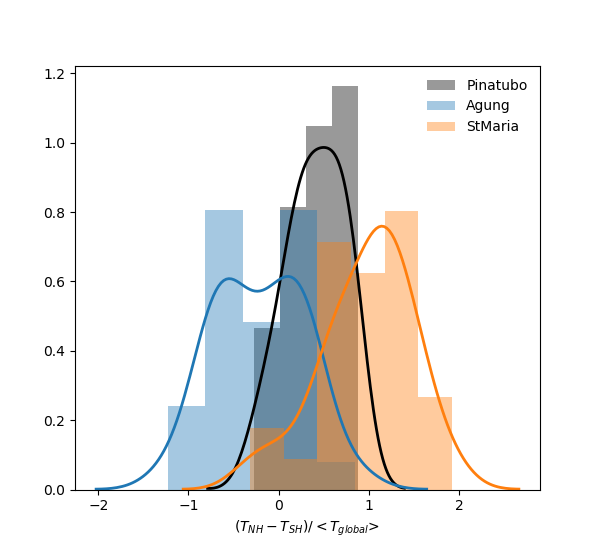

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [80]:
# plot
fig, ax = plt.subplots(figsize=(6, 5.5))
alpha = .5
n_years = 5
# bins = np.arange()
# xmin, xmax = -2, 0
# ymin, ymax = -6.5, 0

# 
volc = 'Pinatubo'
color = 'k'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv] - das[keyc] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nh'] - das[keyc+'_nh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_sh'] - das[keyc+'_sh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = (da_nh - da_sh)/da.mean()

# da.plot.hist(color=color, alpha=alpha)
sns.distplot(da, color=color, label=volc)

volc = 'Agung'
color = 'k'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv] - das[keyc] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nh'] - das[keyc+'_nh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_sh'] - das[keyc+'_sh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = (da_nh - da_sh)/da.mean()

# da.plot.hist(alpha=alpha)
sns.distplot(da, label=volc)


volc = 'StMaria'
color = 'k'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv] - das[keyc] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nh'] - das[keyc+'_nh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_sh'] - das[keyc+'_sh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = (da_nh - da_sh)/da.mean()

# da.plot.hist(alpha=alpha)
sns.distplot(da, label=volc)

ax.autoscale()
plt.legend()
s = '$(T_{NH} - T_{SH})/<T_{global}$>'
plt.xlabel(s)

figname = f'figs/fig_scatter_NF_vs_Ts_years1to{n_years}.pdf'
# plt.savefig(figname)

<IPython.core.display.Javascript object>


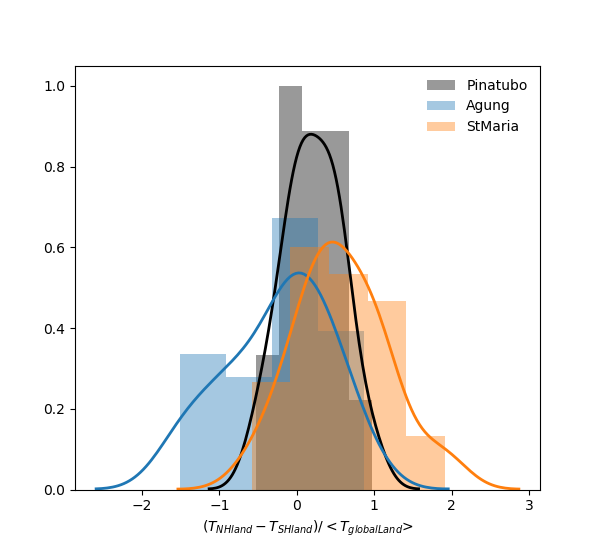

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [119]:
# plot, land only
fig, ax = plt.subplots(figsize=(6, 5.5))
alpha = .5
n_years = 5
# bins = np.arange()
# xmin, xmax = -2, 0
# ymin, ymax = -6.5, 0

# 
volc = 'Pinatubo'
color = 'k'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv+'_land'] - das[keyc+'_land'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nhland'] - das[keyc+'_nhland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_shland'] - das[keyc+'_shland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = (da_nh - da_sh)/da.mean()

# da.plot.hist(color=color, alpha=alpha)
sns.distplot(da, color=color, label=volc)

volc = 'Agung'
color = 'k'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv+'_land'] - das[keyc+'_land'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nhland'] - das[keyc+'_nhland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_shland'] - das[keyc+'_shland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = (da_nh - da_sh)/da.mean()

# da.plot.hist(alpha=alpha)
sns.distplot(da, label=volc)


volc = 'StMaria'
color = 'k'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv+'_land'] - das[keyc+'_land'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nhland'] - das[keyc+'_nhland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_shland'] - das[keyc+'_shland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = (da_nh - da_sh)/da.mean()

# da.plot.hist(alpha=alpha)
sns.distplot(da, label=volc)

ax.autoscale()
plt.legend()
s = '$(T_{NHland} - T_{SHland})/<T_{globalLand}$>'
plt.xlabel(s)

figname = f'figs/fig_scatter_NF_vs_Ts_years1to{n_years}.pdf'
# plt.savefig(figname)

<IPython.core.display.Javascript object>


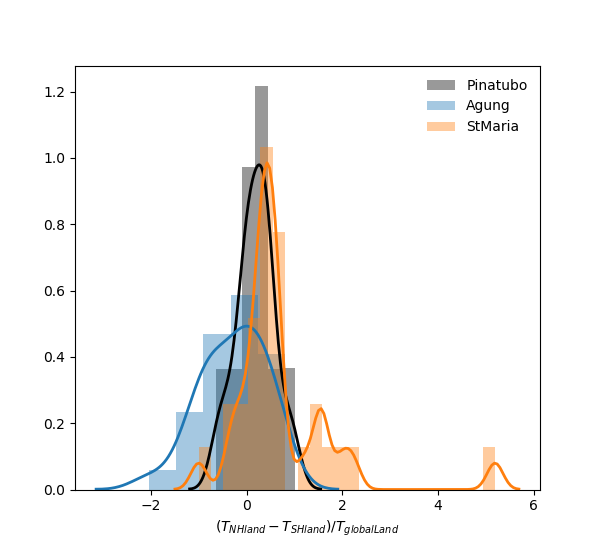

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [133]:
# plot, land only, normalized by T_globalLand instead of <T_globalLand>
fig, ax = plt.subplots(figsize=(6, 5.5))
alpha = .5
n_years = 5
# bins = np.arange()
# xmin, xmax = -2, 0
# ymin, ymax = -6.5, 0

# 
volc = 'Pinatubo'
color = 'k'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv+'_land'] - das[keyc+'_land'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nhland'] - das[keyc+'_nhland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_shland'] - das[keyc+'_shland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = (da_nh - da_sh)/da

# da.plot.hist(color=color, alpha=alpha)
sns.distplot(da, color=color, label=volc)

volc = 'Agung'
color = 'k'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv+'_land'] - das[keyc+'_land'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nhland'] - das[keyc+'_nhland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_shland'] - das[keyc+'_shland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = (da_nh - da_sh)/da

# da.plot.hist(alpha=alpha)
sns.distplot(da, label=volc)


volc = 'StMaria'
color = 'k'

dataname = 't_surf'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv+'_land'] - das[keyc+'_land'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nhland'] - das[keyc+'_nhland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_shland'] - das[keyc+'_shland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = (da_nh - da_sh)/da

# da.plot.hist(alpha=alpha)
sns.distplot(da, label=volc)

ax.autoscale()
plt.legend()
s = '$(T_{NHland} - T_{SHland})/T_{globalLand}$'
plt.xlabel(s)

figname = f'figs/fig_scatter_NF_vs_Ts_years1to{n_years}.pdf'
# plt.savefig(figname)

### asymmetry index: Prcp

<IPython.core.display.Javascript object>


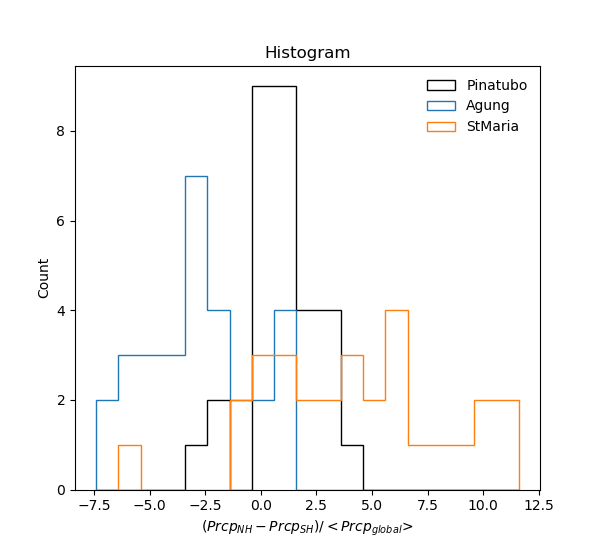

In [74]:
# plot
fig, ax = plt.subplots(figsize=(6, 5.5))
dataname = 'precip'
alpha = 1
n_years = 5
bins = np.arange(-7.4, 12.6, 1)
# xmin, xmax = -2, 0
# ymin, ymax = -6.5, 0
histtype = 'step'
stacked = False
# 
volc = 'Pinatubo'
color = 'k'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv] - das[keyc] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nh'] - das[keyc+'_nh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_sh'] - das[keyc+'_sh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = (da_nh - da_sh)/da.mean() 

da.plot.hist(color=color, alpha=alpha, label=volc, bins=bins, histtype=histtype, stacked=stacked)

volc = 'Agung'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv] - das[keyc] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nh'] - das[keyc+'_nh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_sh'] - das[keyc+'_sh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = (da_nh - da_sh)/da.mean() 

da.plot.hist(alpha=alpha, label=volc, bins=bins, histtype=histtype, stacked=stacked)
# sns.distplot(da)


volc = 'StMaria'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv] - das[keyc] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nh'] - das[keyc+'_nh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_sh'] - das[keyc+'_sh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = (da_nh - da_sh)/da.mean() 

da.plot.hist(alpha=alpha, label=volc, bins=bins, histtype=histtype, stacked=stacked)
# sns.distplot(da)

ax.autoscale()
plt.legend()
s = '$(Prcp_{NH} - Prcp_{SH})/<Prcp_{global}$>'
plt.xlabel(s)

figname = f'figs/fig_scatter_NF_vs_Ts_years1to{n_years}.pdf'
# plt.savefig(figname)

<IPython.core.display.Javascript object>


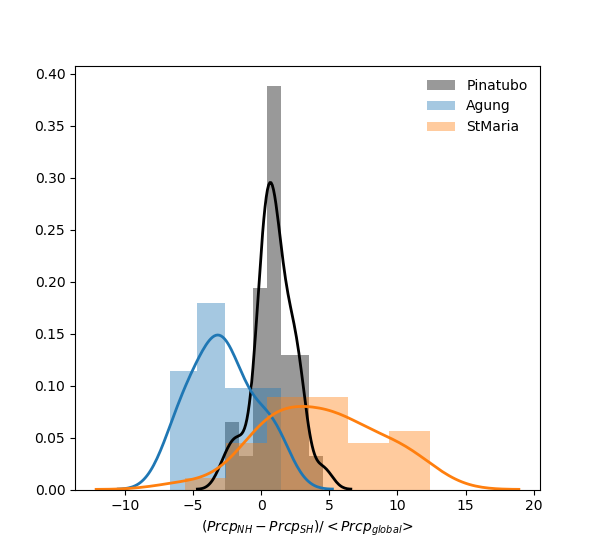

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [82]:
# plot
fig, ax = plt.subplots(figsize=(6, 5.5))
dataname = 'precip'
alpha = 1
n_years = 5
bins = np.arange(-7.4, 12.6, 1)
# xmin, xmax = -2, 0
# ymin, ymax = -6.5, 0
histtype = 'step'
stacked = False
# 
volc = 'Pinatubo'
color = 'k'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv] - das[keyc] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nh'] - das[keyc+'_nh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_sh'] - das[keyc+'_sh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = (da_nh - da_sh)/da.mean() 

sns.distplot(da, color=color, label=volc)

volc = 'Agung'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv] - das[keyc] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nh'] - das[keyc+'_nh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_sh'] - das[keyc+'_sh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = (da_nh - da_sh)/da.mean() 

sns.distplot(da, label=volc)



volc = 'StMaria'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv] - das[keyc] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nh'] - das[keyc+'_nh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_sh'] - das[keyc+'_sh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = (da_nh - da_sh)/da.mean() 

sns.distplot(da, label=volc)

ax.autoscale()
plt.legend()
s = '$(Prcp_{NH} - Prcp_{SH})/<Prcp_{global}$>'
plt.xlabel(s)

figname = f'figs/fig_scatter_NF_vs_Ts_years1to{n_years}.pdf'
# plt.savefig(figname)

<IPython.core.display.Javascript object>


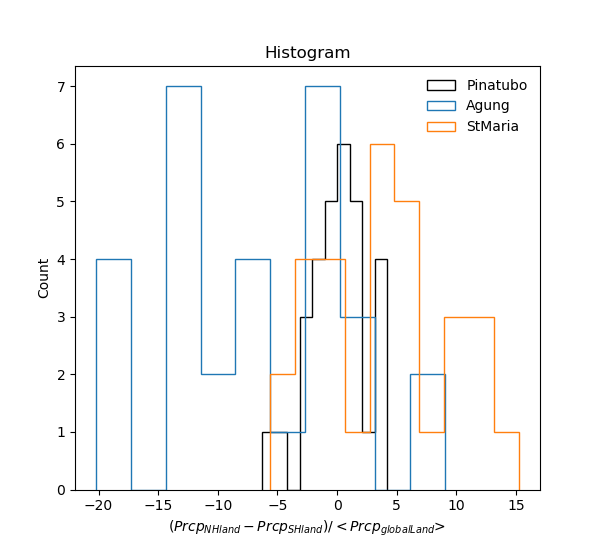

In [118]:
# plot, land only
fig, ax = plt.subplots(figsize=(6, 5.5))
dataname = 'precip'
alpha = 1
n_years = 5
bins = None#np.arange(-7.4, 12.6, 1)
# xmin, xmax = -2, 0
# ymin, ymax = -6.5, 0
histtype = 'step'
stacked = False
# 
volc = 'Pinatubo'
color = 'k'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv+'_land'] - das[keyc+'_land'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nhland'] - das[keyc+'_nhland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_shland'] - das[keyc+'_shland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = (da_nh - da_sh)/da.mean() 

da.plot.hist(color=color, alpha=alpha, label=volc, bins=bins, histtype=histtype, stacked=stacked)

volc = 'Agung'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv+'_land'] - das[keyc+'_land'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nhland'] - das[keyc+'_nhland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_shland'] - das[keyc+'_shland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = (da_nh - da_sh)/da.mean() 

da.plot.hist(alpha=alpha, label=volc, bins=bins, histtype=histtype, stacked=stacked)
# sns.distplot(da)


volc = 'StMaria'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv+'_land'] - das[keyc+'_land'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nhland'] - das[keyc+'_nhland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_shland'] - das[keyc+'_shland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = (da_nh - da_sh)/da.mean() 

da.plot.hist(alpha=alpha, label=volc, bins=bins, histtype=histtype, stacked=stacked)
# sns.distplot(da)

ax.autoscale()
plt.legend()
s = '$(Prcp_{NHland} - Prcp_{SHland})/<Prcp_{globalLand}$>'
plt.xlabel(s)

figname = f'figs/fig_scatter_NF_vs_Ts_years1to{n_years}.pdf'
# plt.savefig(figname)

<IPython.core.display.Javascript object>


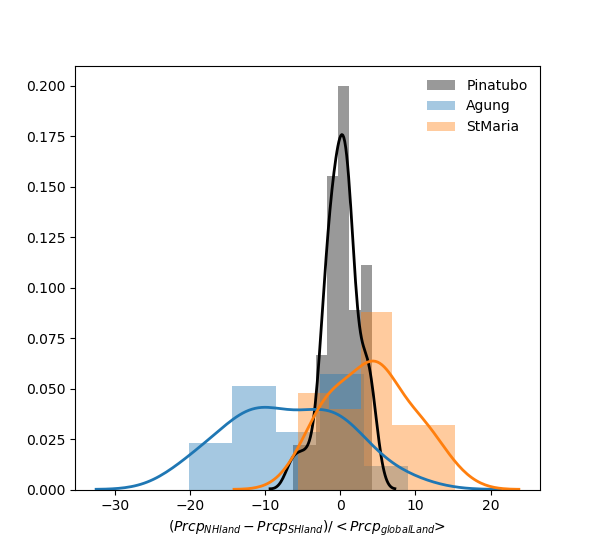

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [116]:
# plot: land only
fig, ax = plt.subplots(figsize=(6, 5.5))
dataname = 'precip'
alpha = 1
n_years = 5
bins = np.arange(-7.4, 12.6, 1)
# xmin, xmax = -2, 0
# ymin, ymax = -6.5, 0
histtype = 'step'
stacked = False
# 
volc = 'Pinatubo'
color = 'k'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv+'_land'] - das[keyc+'_land'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nhland'] - das[keyc+'_nhland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_shland'] - das[keyc+'_shland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = (da_nh - da_sh)/da.mean() 

sns.distplot(da, color=color, label=volc)

volc = 'Agung'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv+'_land'] - das[keyc+'_land'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nhland'] - das[keyc+'_nhland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_shland'] - das[keyc+'_shland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = (da_nh - da_sh)/da.mean() 

sns.distplot(da, label=volc)



volc = 'StMaria'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv+'_land'] - das[keyc+'_land'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nhland'] - das[keyc+'_nhland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_shland'] - das[keyc+'_shland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = (da_nh - da_sh)/da.mean() 

sns.distplot(da, label=volc)

ax.autoscale()
plt.legend()
s = '$(Prcp_{NHland} - Prcp_{SHland})/<Prcp_{globalLand}$>'
plt.xlabel(s)

figname = f'figs/fig_scatter_NF_vs_Ts_years1to{n_years}.pdf'
# plt.savefig(figname)

<IPython.core.display.Javascript object>


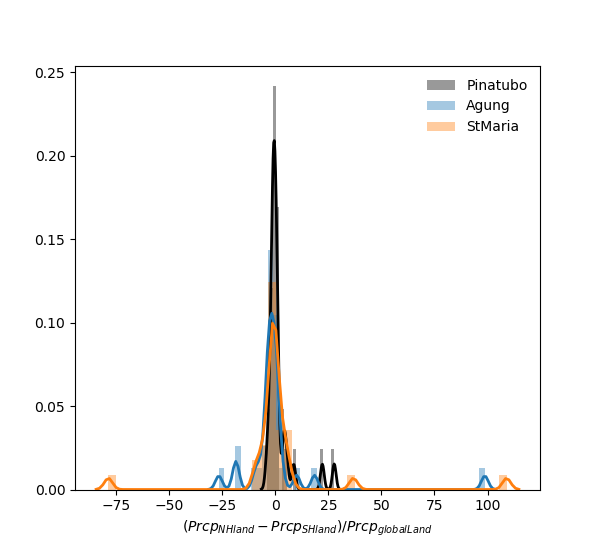

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [134]:
# plot: land only, normalized by Prcp_globalLand instead of <Prcp_globalLand>
fig, ax = plt.subplots(figsize=(6, 5.5))
dataname = 'precip'
alpha = 1
n_years = 5
bins = np.arange(-7.4, 12.6, 1)
# xmin, xmax = -2, 0
# ymin, ymax = -6.5, 0
histtype = 'step'
stacked = False
# 
volc = 'Pinatubo'
color = 'k'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv+'_land'] - das[keyc+'_land'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nhland'] - das[keyc+'_nhland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_shland'] - das[keyc+'_shland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = (da_nh - da_sh)/da

sns.distplot(da, color=color, label=volc)

volc = 'Agung'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv+'_land'] - das[keyc+'_land'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nhland'] - das[keyc+'_nhland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_shland'] - das[keyc+'_shland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = (da_nh - da_sh)/da

sns.distplot(da, label=volc)



volc = 'StMaria'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv+'_land'] - das[keyc+'_land'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nhland'] - das[keyc+'_nhland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_shland'] - das[keyc+'_shland'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = (da_nh - da_sh)/da

sns.distplot(da, label=volc)

ax.autoscale()
plt.legend()
s = '$(Prcp_{NHland} - Prcp_{SHland})/Prcp_{globalLand}$'
plt.xlabel(s)

figname = f'figs/fig_scatter_NF_vs_Ts_years1to{n_years}.pdf'
# plt.savefig(figname)

### asymmetry index: Nino/Nina

<IPython.core.display.Javascript object>


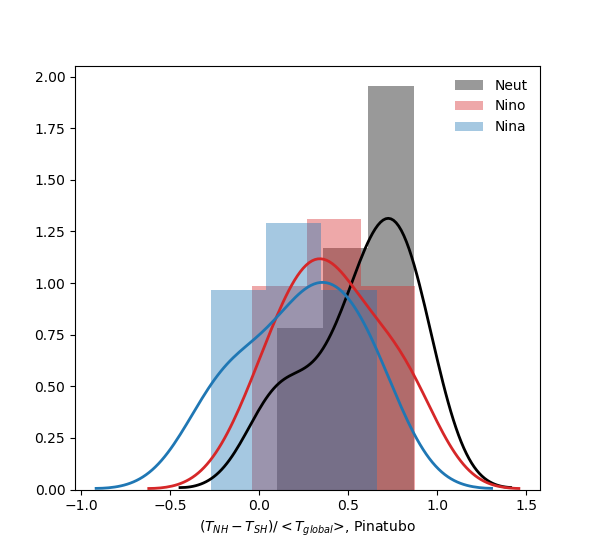

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'$(T_{NH} - T_{SH})/<T_{global}$>, Pinatubo')

In [90]:
# plot
fig, ax = plt.subplots(figsize=(6, 5.5))
alpha = .5
n_years = 5
# bins = np.arange()
# xmin, xmax = -2, 0
# ymin, ymax = -6.5, 0

# 
dataname = 't_surf'
volc = 'Pinatubo'
color = 'k'

ens = neut_ens
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv] - das[keyc] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nh'] - das[keyc+'_nh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_sh'] - das[keyc+'_sh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = (da_nh - da_sh)/da.mean()

# da.plot.hist(color=color, alpha=alpha)
sns.distplot(da.sel(en=neut_ens), color=color, label='Neut')
sns.distplot(da.sel(en=nino_ens), color='C3', label='Nino')
sns.distplot(da.sel(en=nina_ens), color='C0', label='Nina')


ax.autoscale()
plt.legend()
s = '$(T_{NH} - T_{SH})/<T_{global}$>' + f', {volc}'
plt.xlabel(s)


<IPython.core.display.Javascript object>


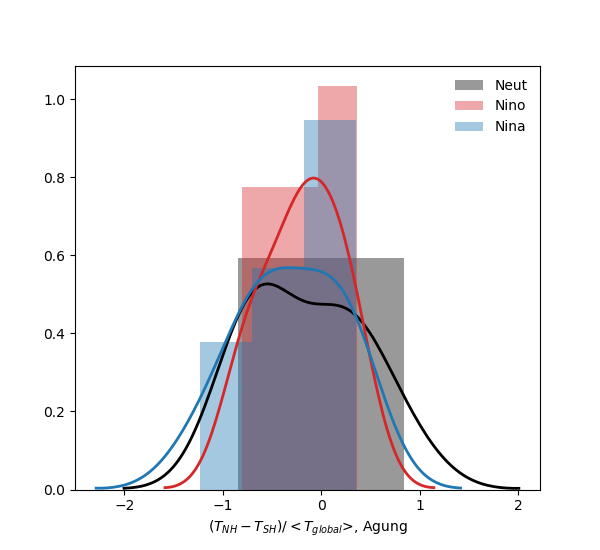

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'$(T_{NH} - T_{SH})/<T_{global}$>, Agung')

In [91]:
# plot
fig, ax = plt.subplots(figsize=(6, 5.5))
alpha = .5
n_years = 5
# bins = np.arange()
# xmin, xmax = -2, 0
# ymin, ymax = -6.5, 0

# 
dataname = 't_surf'
volc = 'Agung'
color = 'k'

ens = neut_ens
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv] - das[keyc] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nh'] - das[keyc+'_nh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_sh'] - das[keyc+'_sh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = (da_nh - da_sh)/da.mean()

# da.plot.hist(color=color, alpha=alpha)
sns.distplot(da.sel(en=neut_ens), color=color, label='Neut')
sns.distplot(da.sel(en=nino_ens), color='C3', label='Nino')
sns.distplot(da.sel(en=nina_ens), color='C0', label='Nina')


ax.autoscale()
plt.legend()
s = '$(T_{NH} - T_{SH})/<T_{global}$>' + f', {volc}'
plt.xlabel(s)


<IPython.core.display.Javascript object>


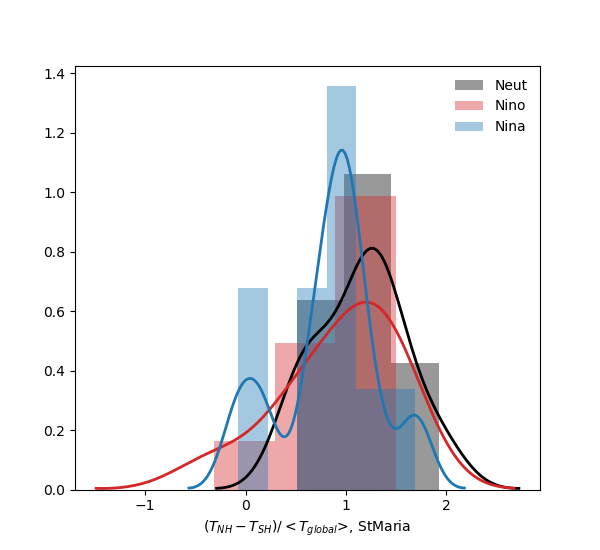

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'$(T_{NH} - T_{SH})/<T_{global}$>, StMaria')

In [92]:
# plot
fig, ax = plt.subplots(figsize=(6, 5.5))
alpha = .5
n_years = 5
# bins = np.arange()
# xmin, xmax = -2, 0
# ymin, ymax = -6.5, 0

# 
dataname = 't_surf'
volc = 'StMaria'
color = 'k'

ens = neut_ens
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv] - das[keyc] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nh'] - das[keyc+'_nh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_sh'] - das[keyc+'_sh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = (da_nh - da_sh)/da.mean()

# da.plot.hist(color=color, alpha=alpha)
sns.distplot(da.sel(en=neut_ens), color=color, label='Neut')
sns.distplot(da.sel(en=nino_ens), color='C3', label='Nino')
sns.distplot(da.sel(en=nina_ens), color='C0', label='Nina')


ax.autoscale()
plt.legend()
s = '$(T_{NH} - T_{SH})/<T_{global}$>' + f', {volc}'
plt.xlabel(s)


prcp

<IPython.core.display.Javascript object>


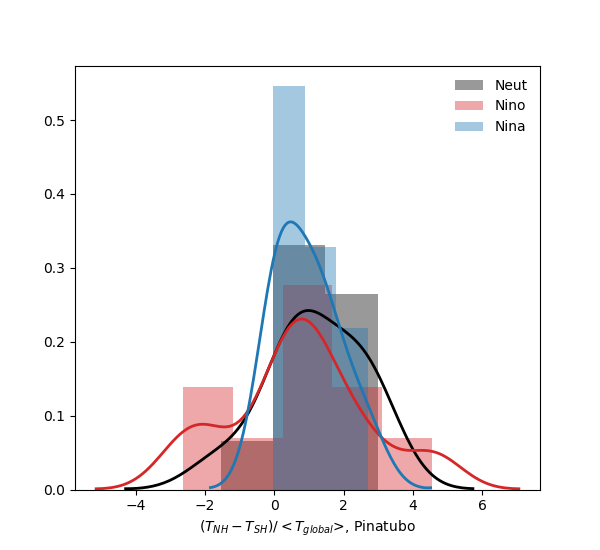

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'$(T_{NH} - T_{SH})/<T_{global}$>, Pinatubo')

In [93]:
# plot
fig, ax = plt.subplots(figsize=(6, 5.5))
alpha = .5
n_years = 5
# bins = np.arange()
# xmin, xmax = -2, 0
# ymin, ymax = -6.5, 0

# 
dataname = 'precip'
volc = 'Pinatubo'
color = 'k'

ens = neut_ens
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv] - das[keyc] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nh'] - das[keyc+'_nh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_sh'] - das[keyc+'_sh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = (da_nh - da_sh)/da.mean()

# da.plot.hist(color=color, alpha=alpha)
sns.distplot(da.sel(en=neut_ens), color=color, label='Neut')
sns.distplot(da.sel(en=nino_ens), color='C3', label='Nino')
sns.distplot(da.sel(en=nina_ens), color='C0', label='Nina')


ax.autoscale()
plt.legend()
s = '$(T_{NH} - T_{SH})/<T_{global}$>' + f', {volc}'
plt.xlabel(s)


<IPython.core.display.Javascript object>


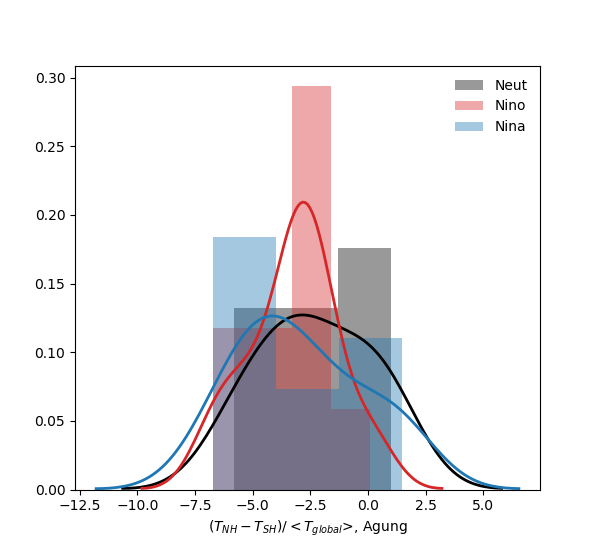

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'$(T_{NH} - T_{SH})/<T_{global}$>, Agung')

In [95]:
# plot
fig, ax = plt.subplots(figsize=(6, 5.5))
alpha = .5
n_years = 5
# bins = np.arange()
# xmin, xmax = -2, 0
# ymin, ymax = -6.5, 0

# 
dataname = 'precip'
volc = 'Agung'
color = 'k'

ens = neut_ens
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv] - das[keyc] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nh'] - das[keyc+'_nh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_sh'] - das[keyc+'_sh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = (da_nh - da_sh)/da.mean()

# da.plot.hist(color=color, alpha=alpha)
sns.distplot(da.sel(en=neut_ens), color=color, label='Neut')
sns.distplot(da.sel(en=nino_ens), color='C3', label='Nino')
sns.distplot(da.sel(en=nina_ens), color='C0', label='Nina')


ax.autoscale()
plt.legend()
s = '$(T_{NH} - T_{SH})/<T_{global}$>' + f', {volc}'
plt.xlabel(s)


<IPython.core.display.Javascript object>


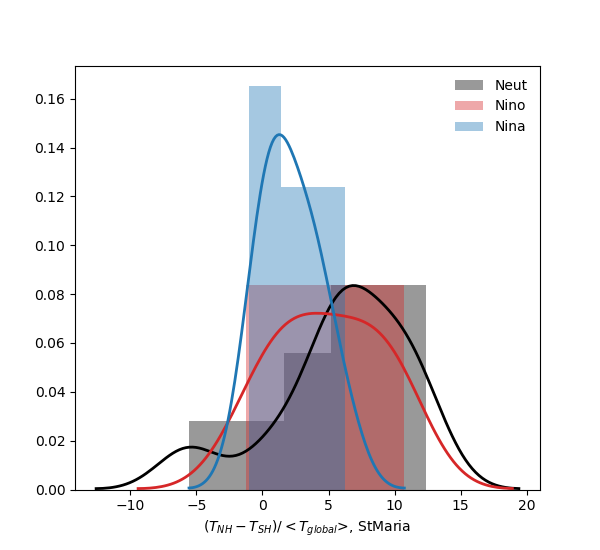

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'$(T_{NH} - T_{SH})/<T_{global}$>, StMaria')

In [96]:
# plot
fig, ax = plt.subplots(figsize=(6, 5.5))
alpha = .5
n_years = 5
# bins = np.arange()
# xmin, xmax = -2, 0
# ymin, ymax = -6.5, 0

# 
dataname = 'precip'
volc = 'StMaria'
color = 'k'

ens = neut_ens
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv] - das[keyc] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nh'] - das[keyc+'_nh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_sh'] - das[keyc+'_sh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = (da_nh - da_sh)/da.mean()

# da.plot.hist(color=color, alpha=alpha)
sns.distplot(da.sel(en=neut_ens), color=color, label='Neut')
sns.distplot(da.sel(en=nino_ens), color='C3', label='Nino')
sns.distplot(da.sel(en=nina_ens), color='C0', label='Nina')


ax.autoscale()
plt.legend()
s = '$(T_{NH} - T_{SH})/<T_{global}$>' + f', {volc}'
plt.xlabel(s)


### global mean

<IPython.core.display.Javascript object>


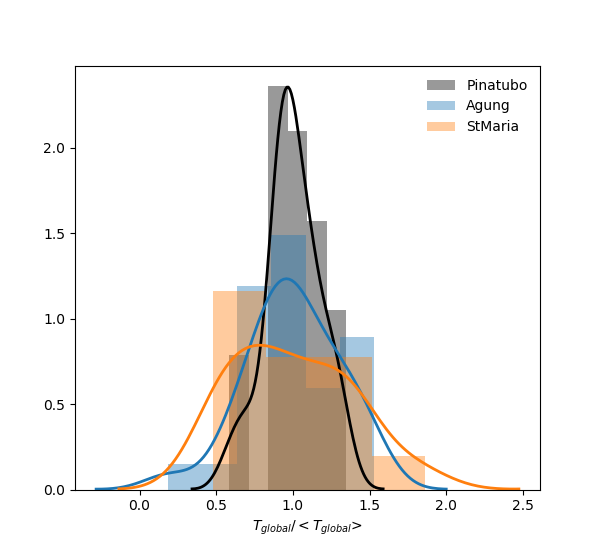

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'$T_{global}/<T_{global}$>')

In [135]:
# plot, Ts
fig, ax = plt.subplots(figsize=(6, 5.5))
alpha = .5
n_years = 5
# bins = np.arange()
# xmin, xmax = -2, 0
# ymin, ymax = -6.5, 0

# 
dataname = 't_surf'
color = 'k'

volc = 'Pinatubo'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv] - das[keyc] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nh'] - das[keyc+'_nh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_sh'] - das[keyc+'_sh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = da/da.mean()

sns.distplot(da, color=color, label=volc)

volc = 'Agung'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv] - das[keyc] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nh'] - das[keyc+'_nh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_sh'] - das[keyc+'_sh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = da/da.mean()

sns.distplot(da, label=volc)

volc = 'StMaria'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv] - das[keyc] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nh'] - das[keyc+'_nh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_sh'] - das[keyc+'_sh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = da/da.mean()

sns.distplot(da, label=volc)


ax.autoscale()
plt.legend()
s = '$T_{global}/<T_{global}$>'
plt.xlabel(s)


<IPython.core.display.Javascript object>


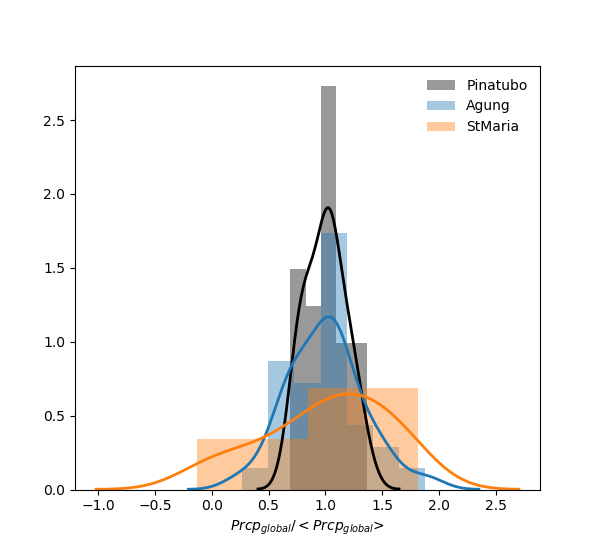

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'$Prcp_{global}/<Prcp_{global}$>')

In [131]:
# plot, precip
fig, ax = plt.subplots(figsize=(6, 5.5))
alpha = .5
n_years = 5
# bins = np.arange()
# xmin, xmax = -2, 0
# ymin, ymax = -6.5, 0

# 
dataname = 'precip'
color = 'k'

volc = 'Pinatubo'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv] - das[keyc] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nh'] - das[keyc+'_nh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_sh'] - das[keyc+'_sh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = da/da.mean()

sns.distplot(da, color=color, label=volc)

volc = 'Agung'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv] - das[keyc] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nh'] - das[keyc+'_nh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_sh'] - das[keyc+'_sh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = da/da.mean()

sns.distplot(da, label=volc)

volc = 'StMaria'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv] - das[keyc] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nh'] - das[keyc+'_nh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_sh'] - das[keyc+'_sh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = da/da.mean()

sns.distplot(da, label=volc)


ax.autoscale()
plt.legend()
s = '$Prcp_{global}/<Prcp_{global}$>'
plt.xlabel(s)


<IPython.core.display.Javascript object>


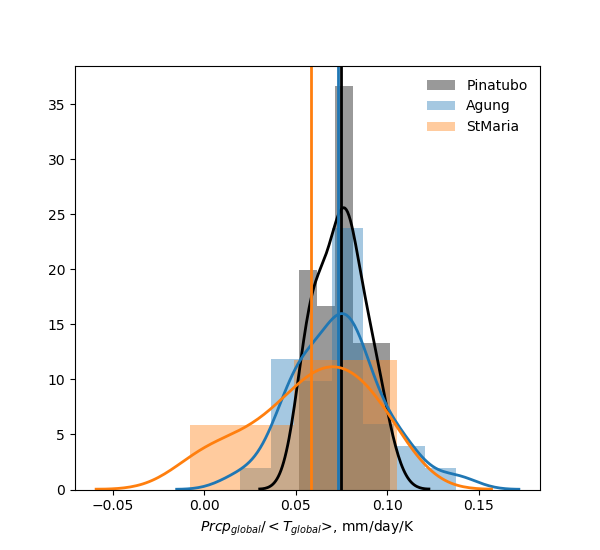

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'$Prcp_{global}/<T_{global}$>, mm/day/K')

In [130]:
# plot, precip, normalized by <T_{global}>
fig, ax = plt.subplots(figsize=(6, 5.5))
alpha = .5
n_years = 5
# bins = np.arange()
# xmin, xmax = -2, 0
# ymin, ymax = -6.5, 0

# 
dataname = 'precip'
color = 'k'

volc = 'Pinatubo'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv] - das[keyc] ).isel(time=slice(0, n_years*12)).sum('time')/12*24*3600
da_ = ( das[keyv.replace(dataname, 't_surf')] - das[keyc.replace(dataname, 't_surf')] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = da/da_.mean()

sns.distplot(da, color=color, label=volc)
plt.axvline(da.mean(), color=color)

volc = 'Agung'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv] - das[keyc] ).isel(time=slice(0, n_years*12)).sum('time')/12*24*3600
da_ = ( das[keyv.replace(dataname, 't_surf')] - das[keyc.replace(dataname, 't_surf')] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = da/da_.mean()

sns.distplot(da, label=volc)
plt.axvline(da.mean(), color='C0')

volc = 'StMaria'
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv] - das[keyc] ).isel(time=slice(0, n_years*12)).sum('time')/12*24*3600
da_ = ( das[keyv.replace(dataname, 't_surf')] - das[keyc.replace(dataname, 't_surf')] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = da/da_.mean()

sns.distplot(da, label=volc)
plt.axvline(da.mean(), color='C1')


ax.autoscale()
plt.legend()
s = '$Prcp_{global}/<T_{global}$>, mm/day/K'
plt.xlabel(s)


### global mean: Nino/Nina

<IPython.core.display.Javascript object>


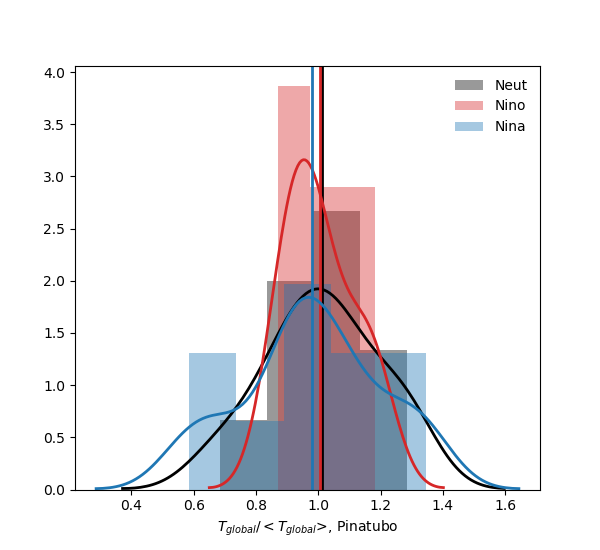

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'$T_{global}/<T_{global}$>, Pinatubo')

In [102]:
# plot
fig, ax = plt.subplots(figsize=(6, 5.5))
alpha = .5
n_years = 5
# bins = np.arange()
# xmin, xmax = -2, 0
# ymin, ymax = -6.5, 0

# 
dataname = 't_surf'
volc = 'Pinatubo'
color = 'k'

ens = neut_ens
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv] - das[keyc] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nh'] - das[keyc+'_nh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_sh'] - das[keyc+'_sh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = da/da.mean()

# da.plot.hist(color=color, alpha=alpha)
sns.distplot(da.sel(en=neut_ens), color=color, label='Neut')
plt.axvline(da.sel(en=neut_ens).mean(), color=color)
sns.distplot(da.sel(en=nino_ens), color='C3', label='Nino')
plt.axvline(da.sel(en=nino_ens).mean(), color='C3')
sns.distplot(da.sel(en=nina_ens), color='C0', label='Nina')
plt.axvline(da.sel(en=nina_ens).mean(), color='C0')


ax.autoscale()
plt.legend()
s = '$T_{global}/<T_{global}$>' + f', {volc}'
plt.xlabel(s)


<IPython.core.display.Javascript object>


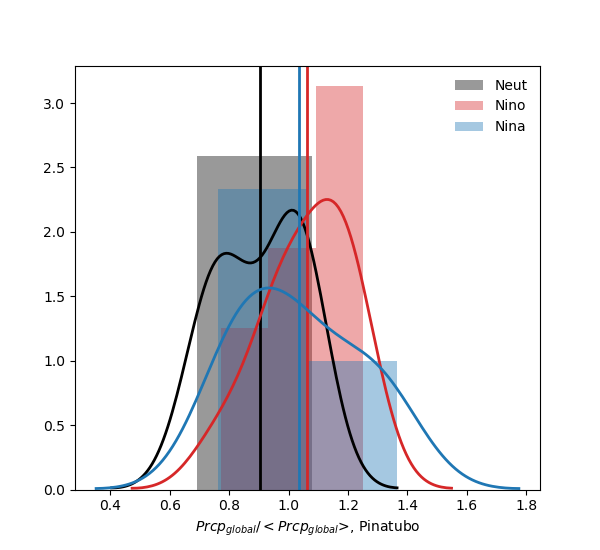

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'$Prcp_{global}/<Prcp_{global}$>, Pinatubo')

In [103]:
# plot
fig, ax = plt.subplots(figsize=(6, 5.5))
alpha = .5
n_years = 5
# bins = np.arange()
# xmin, xmax = -2, 0
# ymin, ymax = -6.5, 0

# 
dataname = 'precip'
volc = 'Pinatubo'
color = 'k'

ens = neut_ens
keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = ( das[keyv] - das[keyc] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_nh = ( das[keyv+'_nh'] - das[keyc+'_nh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da_sh = ( das[keyv+'_sh'] - das[keyc+'_sh'] ).isel(time=slice(0, n_years*12)).sum('time')/12
da = da/da.mean()

# da.plot.hist(color=color, alpha=alpha)
sns.distplot(da.sel(en=neut_ens), color=color, label='Neut')
plt.axvline(da.sel(en=neut_ens).mean(), color=color)
sns.distplot(da.sel(en=nino_ens), color='C3', label='Nino')
plt.axvline(da.sel(en=nino_ens).mean(), color='C3')
sns.distplot(da.sel(en=nina_ens), color='C0', label='Nina')
plt.axvline(da.sel(en=nina_ens).mean(), color='C0')


ax.autoscale()
plt.legend()
s = '$Prcp_{global}/<Prcp_{global}$>' + f', {volc}'
plt.xlabel(s)


In [136]:
%%html
<script src="https://cdn.rawgit.com/parente/4c3e6936d0d7a46fd071/raw/65b816fb9bdd3c28b4ddf3af602bfd6015486383/code_toggle.js">
</script>